## 1.Import Libraries and Data

In [320]:
### Import Libraries
import pandas as pd
import plotly.express as px
import numpy as np
import matplotlib.pyplot as plt
import os
from mpl_toolkits import mplot3d

from plotly.offline import download_plotlyjs, init_notebook_mode
from plotly.offline import plot, iplot
import plotly.graph_objects as go

In [321]:
### Import Data
# Define a path for easier importing 
path = r'C:\Users\DELL\Documents\Climatewins\Data'

In [322]:
df =pd.read_csv(os.path.join(path, 'Dataset.csv'))

In [323]:
df.head()

DATE  MONTH  BASEL_cloud_cover  BASEL_wind_speed  BASEL_humidity  \
0  19600101      1                  7               2.1            0.85   
1  19600102      1                  6               2.1            0.84   
2  19600103      1                  8               2.1            0.90   
3  19600104      1                  3               2.1            0.92   
4  19600105      1                  6               2.1            0.95   

   BASEL_pressure  BASEL_global_radiation  BASEL_precipitation  \
0           1.018                    0.32                 0.09   
1           1.018                    0.36                 1.05   
2           1.018                    0.18                 0.30   
3           1.018                    0.58                 0.00   
4           1.018                    0.65                 0.14   

   BASEL_snow_depth  BASEL_sunshine  ...  VALENTIA_cloud_cover  \
0                 0             0.7  ...                     5   
1                 0             1.1  ...                     7   
2                 0             0.0  ...                     7   
3                 0             4.1  ...                     7   
4                 0             5.4  ...                     3   

   VALENTIA_humidity  VALENTIA_pressure  VALENTIA_global_radiation  \
0               0.88             1.0003                       0.45   
1               0.91             1.0007                       0.25   
2               0.91             1.0096                       0.17   
3               0.86             1.0184                       0.13   
4               0.80             1.0328                       0.46   

   VALENTIA_precipitation  VALENTIA_snow_depth  VALENTIA_sunshine  \
0                    0.34                    0                4.7   
1                    0.84                    0                0.7   
2                    0.08                    0                0.1   
3                    0.98                    0                0.0   
4                    0.00                    0                5.7   

   VALENTIA_temp_mean  VALENTIA_temp_min  VALENTIA_temp_max  
0                 8.5                6.0               10.9  
1                 8.9                5.6               12.1  
2                10.5                8.1               12.9  
3                 7.4                7.3               10.6  
4                 5.7                3.0                8.4  

[5 rows x 170 columns]

# 2. look at a year of temperature data for one of the weather stations (DUSSELDORF 1961)

In [324]:
df1 = df[['DATE', 'MONTH','DUSSELDORF_cloud_cover','DUSSELDORF_wind_speed','DUSSELDORF_humidity','DUSSELDORF_pressure', 'DUSSELDORF_global_radiation','DUSSELDORF_precipitation','DUSSELDORF_snow_depth','DUSSELDORF_sunshine',
'DUSSELDORF_sunshine', 'DUSSELDORF_temp_mean', 'DUSSELDORF_temp_min','DUSSELDORF_temp_max']].copy()

In [325]:
df1

DATE  MONTH  DUSSELDORF_cloud_cover  DUSSELDORF_wind_speed  \
0      19600101      1                       8                    5.4   
1      19600102      1                       8                    3.6   
2      19600103      1                       7                    3.1   
3      19600104      1                       8                    2.7   
4      19600105      1                       7                    4.5   
...         ...    ...                     ...                    ...   
22945  20221027     10                       8                    6.0   
22946  20221028     10                       7                    5.2   
22947  20221029     10                       8                    4.4   
22948  20221030     10                       7                    3.9   
22949  20221031     10                       8                    3.0   

       DUSSELDORF_humidity  DUSSELDORF_pressure  DUSSELDORF_global_radiation  \
0                     0.83               1.0161                         0.12   
1                     0.89               1.0161                         0.18   
2                     0.95               1.0161                         0.12   
3                     0.86               1.0161                         0.12   
4                     0.92               1.0161                         0.12   
...                    ...                  ...                          ...   
22945                 0.75               1.0214                         1.13   
22946                 0.71               1.0186                         1.13   
22947                 0.73               1.0196                         1.13   
22948                 0.73               1.0176                         1.13   
22949                 0.78               1.0184                         1.13   

       DUSSELDORF_precipitation  DUSSELDORF_snow_depth  DUSSELDORF_sunshine  \
0                          0.08                      0                  0.0   
1                          0.66                      0                  0.5   
2                          0.07                      0                  0.0   
3                          0.02                      0                  0.0   
4                          0.62                      0                  0.0   
...                         ...                    ...                  ...   
22945                      0.20                      0                  6.4   
22946                      0.20                      0                  4.9   
22947                      0.20                      0                  4.0   
22948                      0.20                      0                  6.9   
22949                      0.20                      0                  1.7   

       DUSSELDORF_sunshine  DUSSELDORF_temp_mean  DUSSELDORF_temp_min  \
0                      0.0                  10.0                  7.0   
1                      0.5                   8.2                  7.4   
2                      0.0                   7.1                  6.9   
3                      0.0                   6.8                  3.6   
4                      0.0                   7.7                  6.2   
...                    ...                   ...                  ...   
22945                  6.4                  17.8                 13.6   
22946                  4.9                  19.4                 15.4   
22947                  4.0                  18.2                 13.4   
22948                  6.9                  16.7                 11.9   
22949                  1.7                  15.2                  9.7   

       DUSSELDORF_temp_max  
0                     11.5  
1                     11.0  
2                      9.1  
3                      8.0  
4                     11.0  
...                    ...  
22945                 21.4  
22946                 23.9  
22947                 22.0  
22948                 21.1  
22949                 19.5  

In [326]:
# Drop the DATE and MONTH data as those numbers are not scaled with the rest
notemp = df1.drop(['DATE', 'MONTH'], axis = 1)

In [327]:
#Look at a whisker plot of the data to see variations in temperatures
notemp.boxplot(figsize=(15,15))
plt.xticks(rotation=90)

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 [Text(1, 0, 'DUSSELDORF_cloud_cover'),
  Text(2, 0, 'DUSSELDORF_wind_speed'),
  Text(3, 0, 'DUSSELDORF_humidity'),
  Text(4, 0, 'DUSSELDORF_pressure'),
  Text(5, 0, 'DUSSELDORF_global_radiation'),
  Text(6, 0, 'DUSSELDORF_precipitation'),
  Text(7, 0, 'DUSSELDORF_snow_depth'),
  Text(8, 0, 'DUSSELDORF_sunshine'),
  Text(9, 0, 'DUSSELDORF_sunshine'),
  Text(10, 0, 'DUSSELDORF_temp_mean'),
  Text(11, 0, 'DUSSELDORF_temp_min'),
  Text(12, 0, 'DUSSELDORF_temp_max')])

In [328]:
#Reduce your dataset to a single year
dfyear = df1[df1['DATE'].astype(str).str.contains('1961')] 
dfyear

DATE  MONTH  DUSSELDORF_cloud_cover  DUSSELDORF_wind_speed  \
366  19610101      1                       5                    3.4   
367  19610102      1                       8                    6.6   
368  19610103      1                       6                    7.0   
369  19610104      1                       8                    6.9   
370  19610105      1                       3                    5.5   
..        ...    ...                     ...                    ...   
726  19611227     12                       4                    3.0   
727  19611228     12                       8                    2.4   
728  19611229     12                       8                    6.1   
729  19611230     12                       8                    7.1   
730  19611231     12                       8                    7.1   

     DUSSELDORF_humidity  DUSSELDORF_pressure  DUSSELDORF_global_radiation  \
366                 0.88               1.0161                         0.14   
367                 0.81               1.0161                         0.14   
368                 0.78               1.0161                         0.33   
369                 0.81               1.0161                         0.16   
370                 0.89               1.0161                         0.30   
..                   ...                  ...                          ...   
726                 0.71               1.0161                         0.39   
727                 0.86               1.0161                         0.11   
728                 0.85               1.0161                         0.11   
729                 0.88               1.0161                         0.11   
730                 0.92               1.0161                         0.12   

     DUSSELDORF_precipitation  DUSSELDORF_snow_depth  DUSSELDORF_sunshine  \
366                      0.00                      0                  0.1   
367                      0.57                      0                  0.1   
368                      0.07                      0                  2.7   
369                      0.30                      0                  0.3   
370                      0.24                      0                  2.1   
..                        ...                    ...                  ...   
726                      0.00                      0                  4.3   
727                      0.01                      0                  0.0   
728                      0.24                      0                  0.0   
729                      0.05                      0                  0.0   
730                      0.23                      0                  0.0   

     DUSSELDORF_sunshine  DUSSELDORF_temp_mean  DUSSELDORF_temp_min  \
366                  0.1                   3.2                  2.0   
367                  0.1                   4.6                  1.3   
368                  2.7                   5.6                  3.9   
369                  0.3                   4.1                  2.8   
370                  2.1                   3.2                  2.0   
..                   ...                   ...                  ...   
726                  4.3                  -3.6                 -8.5   
727                  0.0                  -1.3                 -3.0   
728                  0.0                   3.5                 -0.8   
729                  0.0                   7.2                  3.4   
730                  0.0                   6.8                  4.8   

     DUSSELDORF_temp_max  
366                  5.8  
367                  5.3  
368                  7.8  
369                  5.0  
370                  5.6  
..                   ...  
726                 -1.8  
727                 -0.6  
728                  5.6  
729                  9.0  
730                 10.6  

[365 rows x 14 columns]

In [329]:
dfyear.describe()

DATE       MONTH  DUSSELDORF_cloud_cover  \
count  3.650000e+02  365.000000              365.000000   
mean   1.961067e+07    6.526027                5.153425   
std    3.454755e+02    3.452584                2.622498   
min    1.961010e+07    1.000000                0.000000   
25%    1.961040e+07    4.000000                3.000000   
50%    1.961070e+07    7.000000                6.000000   
75%    1.961100e+07   10.000000                8.000000   
max    1.961123e+07   12.000000                8.000000   

       DUSSELDORF_wind_speed  DUSSELDORF_humidity  DUSSELDORF_pressure  \
count             365.000000            365.00000         3.650000e+02   
mean                3.660274              0.80526         1.016100e+00   
std                 1.831946              0.08438         4.224639e-15   
min                 0.600000              0.54000         1.016100e+00   
25%                 2.300000              0.75000         1.016100e+00   
50%                 3.300000              0.81000         1.016100e+00   
75%                 4.800000              0.87000         1.016100e+00   
max                10.700000              0.98000         1.016100e+00   

       DUSSELDORF_global_radiation  DUSSELDORF_precipitation  \
count                   365.000000                365.000000   
mean                      1.036137                  0.242548   
std                       0.792025                  0.488303   
min                       0.110000                  0.000000   
25%                       0.370000                  0.000000   
50%                       0.870000                  0.020000   
75%                       1.530000                  0.280000   
max                       3.250000                  5.500000   

       DUSSELDORF_snow_depth  DUSSELDORF_sunshine  DUSSELDORF_sunshine  \
count             365.000000           365.000000           365.000000   
mean                0.123288             3.560000             3.560000   
std                 1.169028             3.626723             3.626723   
min                 0.000000             0.000000             0.000000   
25%                 0.000000             0.100000             0.100000   
50%                 0.000000             2.500000             2.500000   
75%                 0.000000             6.200000             6.200000   
max                13.000000            14.200000            14.200000   

       DUSSELDORF_temp_mean  DUSSELDORF_temp_min  DUSSELDORF_temp_max  
count            365.000000           365.000000           365.000000  
mean              10.699178             7.110959            14.633425  
std                6.267225             5.726840             7.389548  
min               -5.900000           -11.600000            -3.000000  
25%                6.300000             3.400000             9.500000  
50%               11.100000             7.600000            15.400000  
75%               15.300000            11.400000            19.600000  
max               25.200000            18.000000            33.000000

In [330]:
#Drop the DATE and MONTH data as those numbers are not scaled with the rest
notempyear = dfyear.drop(['DATE','MONTH'], axis=1)

In [331]:
#We need to make an index for the year. Create a set of data from 1 to 365 (or to 366 if it's a leap year!)
#We'll scale this by 100 as the index is made. This will help teh gradient descent converge 366 = 3.66
i = np.arange(0.01,3.66,0.01) #<---needs to be one GREATER than the total number of days
index = pd.DataFrame(data = i, columns = ['index'])
index

index
0     0.01
1     0.02
2     0.03
3     0.04
4     0.05
..     ...
360   3.61
361   3.62
362   3.63
363   3.64
364   3.65

[365 rows x 1 columns]

In [332]:
n_rows = dfyear.shape[0]
n_rows

365

In [333]:
#This will translate your chosen weather data into the X and y datasets needed for the optimization function.

X=index.to_numpy().reshape(n_rows,1)
#Represent x_0 as a vector of 1s for vector computation
ones = np.ones((n_rows,1))
X = np.concatenate((ones, X), axis=1)
y=dfyear['DUSSELDORF_temp_mean'].to_numpy().reshape(n_rows,1) 

In [334]:
X.shape, y.shape

((365, 2), (365, 1))

In [335]:
#Look at one year of temperature data over time
plt.scatter(x=index['index'], y=dfyear['DUSSELDORF_temp_mean']) 
plt.xlabel('X'); plt.ylabel('y');
plt.title('Input dataset');

In [336]:
#what is the min temperature? (Note gradient descent is not actually finding this number)
dfyear['DUSSELDORF_temp_mean'].min()

-5.9

In [337]:
#what is the max temperature? (Note gradient descent is not actually finding this number)
dfyear['DUSSELDORF_temp_mean'].max()

25.2

In [338]:
#This computes the loss function for the gradiant descent. DO NOT CHANGE!

def compute_cost(X, y, theta=np.array([[0],[0]])):
    """Given covariate matrix X, the prediction results y and coefficients theta
    compute the loss"""
    
    m = len(y)
    J=0 # initialize loss to zero
    
    # reshape theta
    theta=theta.reshape(2,1)
    
    # calculate the hypothesis - y_hat
    h_x = np.dot(X,theta)
    #print(h_x)
    
    # subtract y from y_hat, square and sum
    error_term = sum((h_x - y)**2)
    
    # divide by twice the number of samples - standard practice.
    loss = error_term/(2*m)
    
    return loss

In [339]:
compute_cost(X,y)

array([76.82145205])

In [340]:
#This is the gradiant descent function. DO NOT CHANGE!

def gradient_descent(X, y, theta=np.array([[0],[0]]),
                    alpha=0.01, num_iterations=1500):
    """
    Solve for theta using Gradient Descent optimiztion technique. 
    Alpha is the learning rate
    """
    m = len(y)
    J_history = []
    theta0_history = []
    theta1_history = []
    theta = theta.reshape(2,1)
    
    for i in range(num_iterations):
        error = (np.dot(X, theta) - y)
        
        term0 = (alpha/m) * sum(error* X[:,0].reshape(m,1))
        term1 = (alpha/m) * sum(error* X[:,1].reshape(m,1))
        
        # update theta
        term_vector = np.array([[term0],[term1]])
        #print(term_vector)
        theta = theta - term_vector.reshape(2,1)
        
        # store history values
        theta0_history.append(theta[0].tolist()[0])
        theta1_history.append(theta[1].tolist()[0])
        J_history.append(compute_cost(X,y,theta).tolist()[0])
        
    return (theta, J_history, theta0_history, theta1_history)

In [341]:
%%time
#This runs your data through a gradiant descent for the starting conditions in 'theta_init.'
#You will need to adjust these numbers

num_iterations=500 #<---Decide how many iterations you need. Start small and work up. Over 10,000 iterations will take a few seconds.
theta_init=np.array([[0],[0]]) #<---this is where you put the guess for [theta0], [theta1]. Start with 1 and 1.
alpha=0.05#<---Decide what your step size is. Try values between 0.1 and 0.00001. You will need to adjust your iterations.
#If your solution is not converging, try a smaller step size.
theta, J_history, theta0_history, theta1_history = gradient_descent(X,y, theta_init,
                                                                   alpha, num_iterations)

CPU times: total: 422 ms
Wall time: 494 ms


In [342]:
theta

array([[9.17612125],
       [0.82803177]])

In [343]:
#This will plot your loss, theta0, and theta1.If the result looks like a straight line, it's not converging on an answer!
#Your loss (red) should be trending toward 0.

fig, ax1 = plt.subplots()

# plot thetas over time
color='tab:blue'
ax1.plot(theta0_history, label='$\\theta_{0}$', linestyle='--', color=color)
ax1.plot(theta1_history, label='$\\theta_{1}$', linestyle='-', color=color)
# ax1.legend()
ax1.set_xlabel('Iterations'); ax1.set_ylabel('$\\theta$', color=color);
ax1.tick_params(axis='y', labelcolor=color)

# plot loss function over time
color='tab:red'
ax2 = ax1.twinx()
ax2.plot(J_history, label='Loss function', color=color)
ax2.set_title('Values of $\\theta$ and $J(\\theta)$ over iterations')
ax2.set_ylabel('Loss: $J(\\theta)$', color=color)
ax1.tick_params(axis='y', labelcolor=color)

# ax2.legend();
fig.legend();

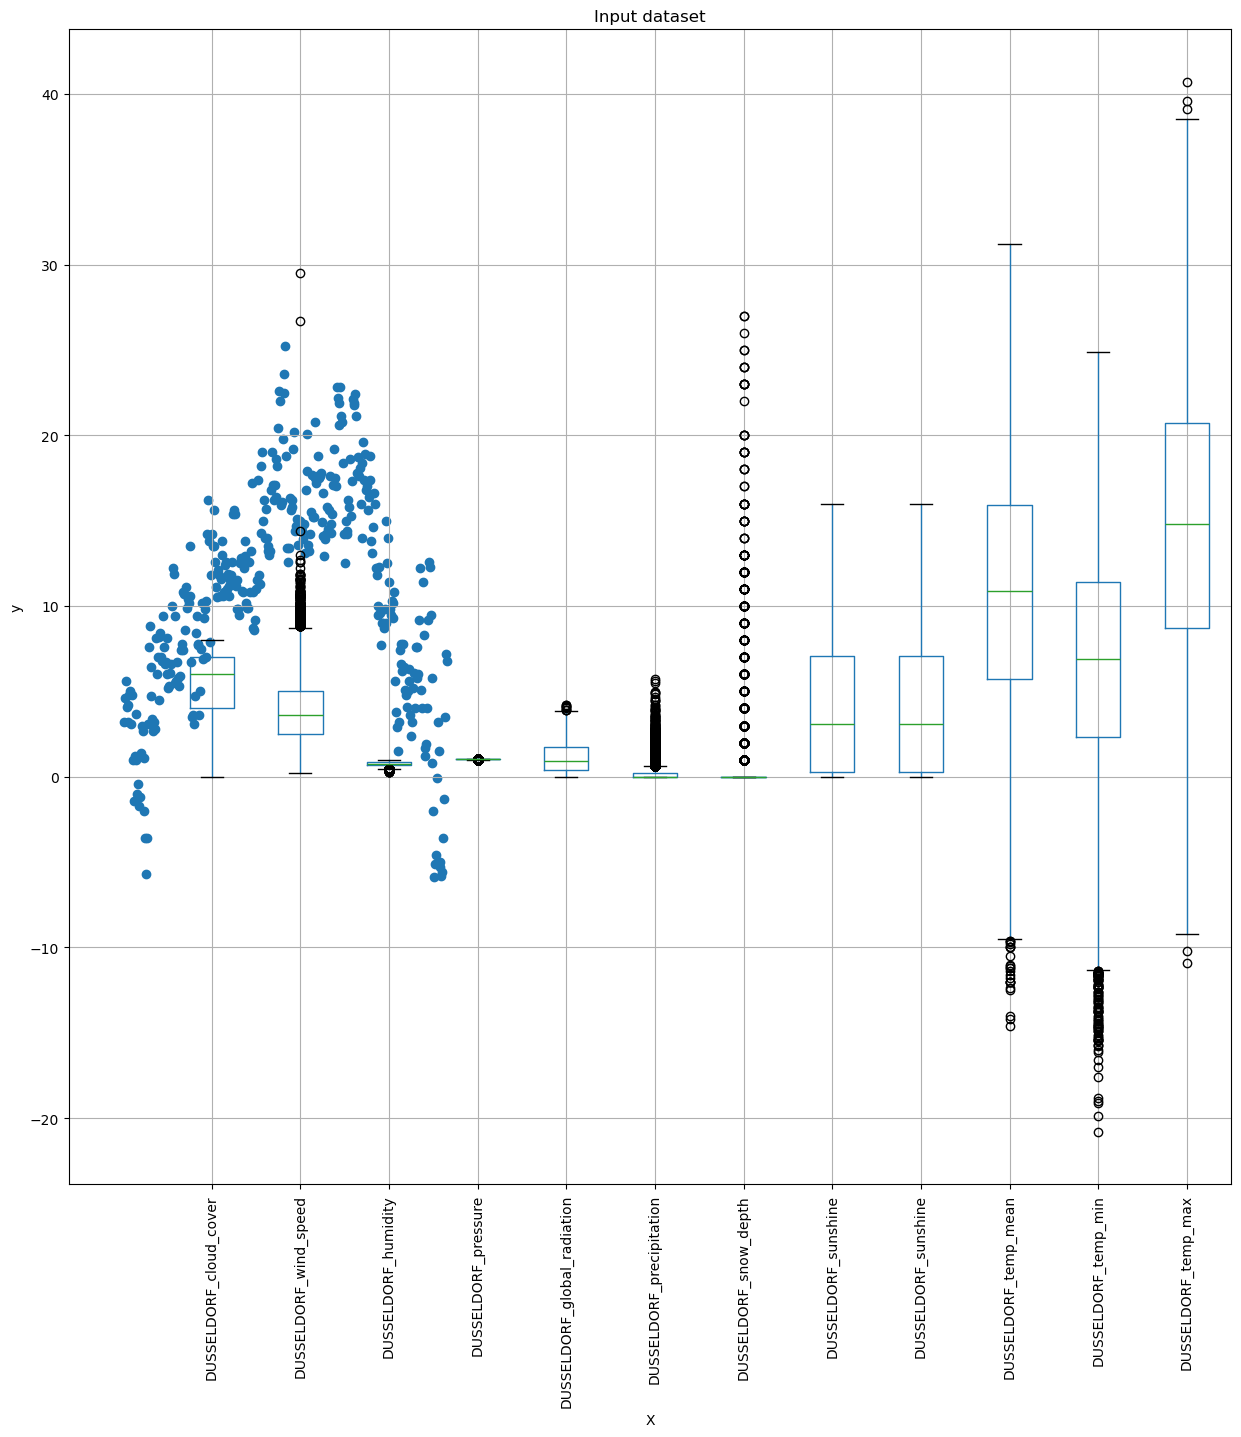

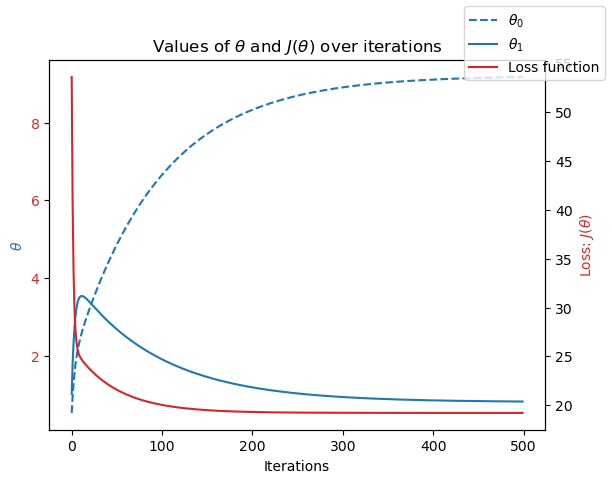

In [344]:
# Display the plot with the legend
plt.show()

In [345]:
%%time
# theta range
theta0_vals = np.linspace(-5,10,100) #Look in the chart above for the limits of where theta0 and theta1 appear.
theta1_vals = np.linspace(0,5,100) #Put those values as the first two "linspace" numbers in these lines
                                      #Select with large margins, maybe +/- 10
J_vals = np.zeros((len(theta0_vals), len(theta1_vals)))

# compute cost for each combination of theta
c1=0; c2=0
for i in theta0_vals:
    for j in theta1_vals:
        t = np.array([i, j])
        J_vals[c1][c2] = compute_cost(X, y, t.transpose()).tolist()[0]
        c2=c2+1
    c1=c1+1
    c2=0 # reinitialize to 0

CPU times: total: 2.45 s
Wall time: 2.89 s


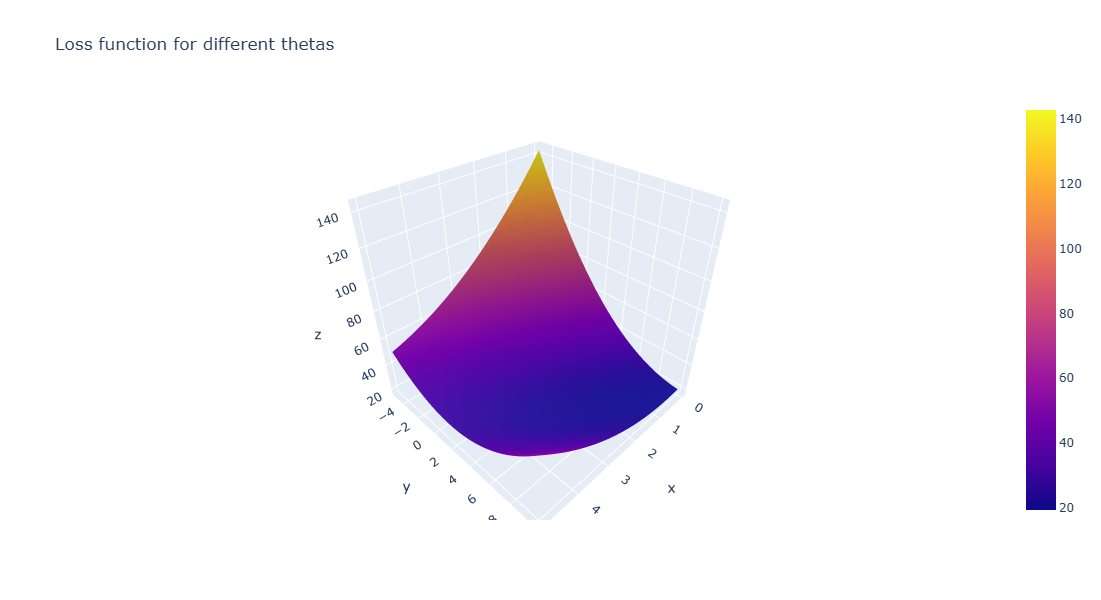

In [346]:
#This figure shows the loss function.

#X = Theta0
#Y - Theta1
#Z = Loss
#Find where it is closest to 0 in X and Y!

#you can click/hold in the graph below to rotate!

fig = go.Figure(data=[go.Surface(x=theta1_vals, y=theta0_vals, z=J_vals)])
fig.update_layout(title='Loss function for different thetas', autosize=True,
                  width=600, height=600, xaxis_title='theta0', 
                 yaxis_title='theta1')
fig.show()

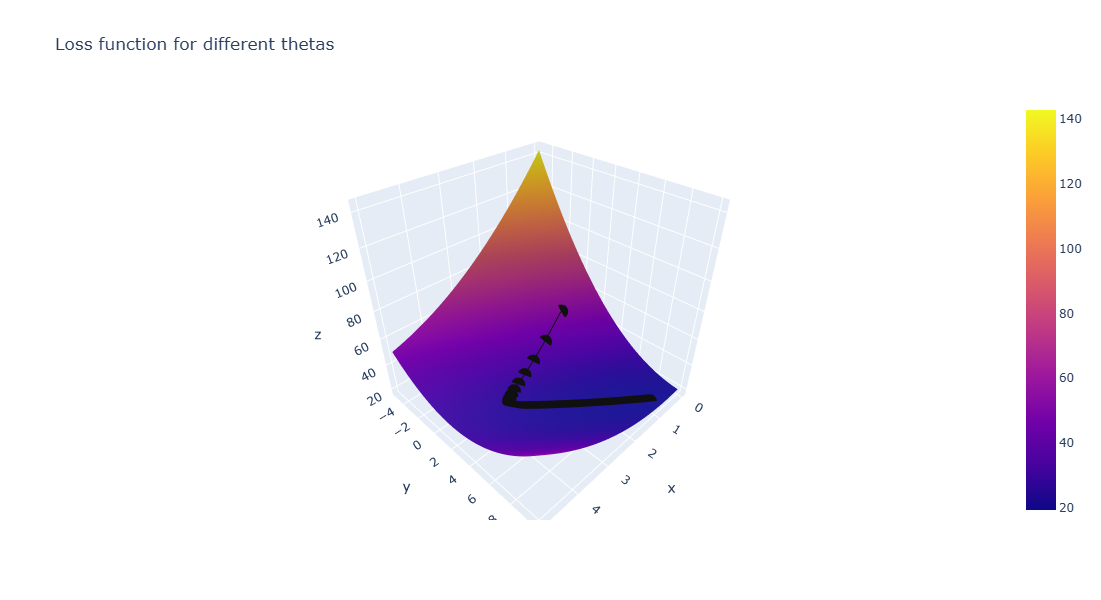

In [347]:
#Here is the same figure as above, with the line the loss function takes toward the minimum.

#X = Theta0
#Y - Theta1
#Z = Loss
#black line = path of loss function over the iterations.
#Find where it is closest to 0 in X and Y!

#you can click/hold in the graph below to rotate!

line_marker = dict(color='#101010', width=2)
fig = go.Figure()
fig.add_surface(x=theta1_vals, y=theta0_vals, z=J_vals)
fig.add_scatter3d(x=theta1_history, y=theta0_history, z=J_history, line=line_marker, name='')
#The below line adds a graph of just the loss over iterations in a 2D plane
plt.plot(theta0_history, theta1_history, 'r+');
fig.update_layout(title='Loss function for different thetas', autosize=True,
                  width=600, height=600, xaxis_title='theta0', 
                 yaxis_title='theta1')
fig.show()

In [348]:
#Rerun the optimization above, but this time start closer to the objective!
#Find where the black line ends near the lowest X/Y/Z coordinate and make that your guess below.

num_iterations=500 #<---start with the same iterations as above
theta_init=np.array([[-0.1],[-0.1]]) #<---make a guess as to a more accurate [x],[y] coordinates near the minimum in the graph above.
alpha= 0.5 #<---start with the same step size as above
theta1, J_history1, theta0_history1, theta1_history1 = gradient_descent(X,y, theta_init,
                                                                   alpha, num_iterations)

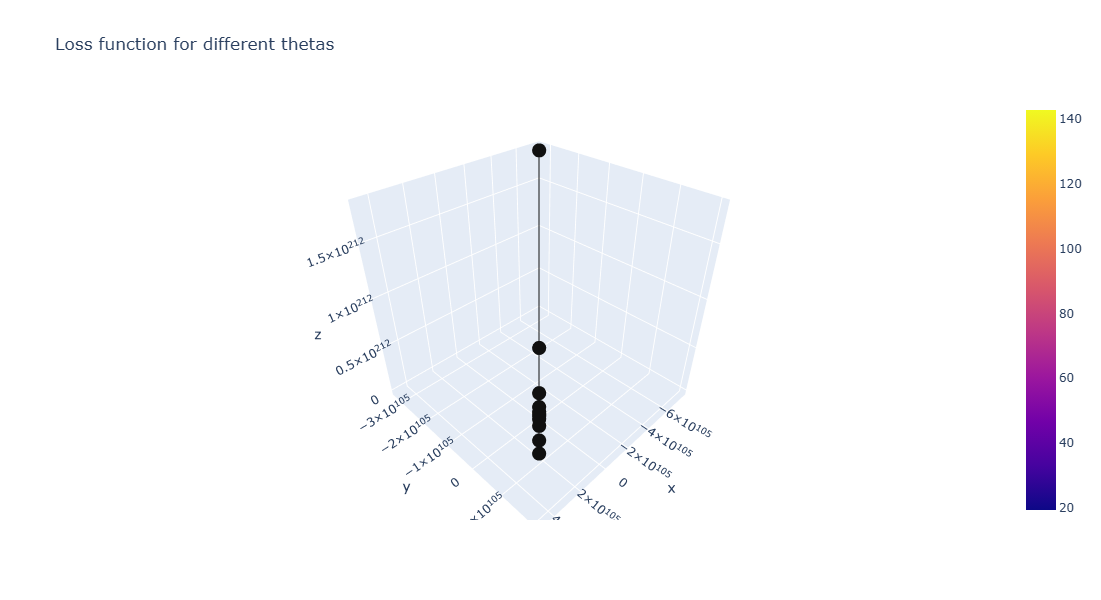

In [349]:
#Let's look at the new loss path on the function. It should start much closer to the goal

line_marker = dict(color='#101010', width=2)
fig = go.Figure()
fig.add_surface(x=theta1_vals, y=theta0_vals, z=J_vals)
fig.add_scatter3d(x=theta1_history1, y=theta0_history1, z=J_history1, line=line_marker, name='')
#The below line adds a graph of just the loss over iterations in a 2D plane
plt.plot(theta0_history1, theta1_history1, 'r+');
fig.update_layout(title='Loss function for different thetas', autosize=True,
                  width=600, height=600, xaxis_title='theta0', 
                 yaxis_title='theta1')
fig.show()

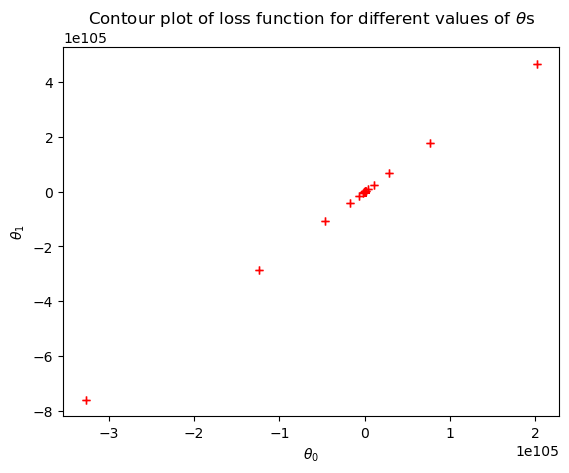

In [350]:
#This plot shows the convergence similar to above, but only in the X/Y plane (there's no height)

plt.contour(theta0_vals, theta1_vals, J_vals, levels = np.logspace(0,10,1000))
plt.xlabel('$\\theta_{0}$'); plt.ylabel("$\\theta_{1}$")
plt.title("Contour plot of loss function for different values of $\\theta$s");
plt.plot(theta0_history1, theta1_history1, 'r+');
plt.show()

### 3. look at a year of temperature data for one of the weather stations (DUSSELDORF 1990)

In [351]:
df2 = df[['DATE', 'MONTH','DUSSELDORF_cloud_cover','DUSSELDORF_wind_speed','DUSSELDORF_humidity','DUSSELDORF_pressure',
'DUSSELDORF_global_radiation','DUSSELDORF_precipitation','DUSSELDORF_snow_depth','DUSSELDORF_sunshine',
'DUSSELDORF_sunshine', 'DUSSELDORF_temp_mean', 'DUSSELDORF_temp_min','DUSSELDORF_temp_max']].copy()

In [352]:
# Drop the DATE and MONTH data as those numbers are not scaled with the rest
notemp = df2.drop(['DATE', 'MONTH'], axis = 1)

In [353]:
#Reduce your dataset to a single year
dfyear = df2[df2['DATE'].astype(str).str.contains('1990')] 
dfyear

DATE  MONTH  DUSSELDORF_cloud_cover  DUSSELDORF_wind_speed  \
10958  19900101      1                       8                    1.4   
10959  19900102      1                       8                    1.3   
10960  19900103      1                       8                    3.3   
10961  19900104      1                       6                    4.8   
10962  19900105      1                       8                    2.7   
...         ...    ...                     ...                    ...   
11318  19901227     12                       6                    7.7   
11319  19901228     12                       6                    6.2   
11320  19901229     12                       8                    5.4   
11321  19901230     12                       4                    5.4   
11322  19901231     12                       6                    4.3   

       DUSSELDORF_humidity  DUSSELDORF_pressure  DUSSELDORF_global_radiation  \
10958                 0.93               1.0196                         0.12   
10959                 0.91               1.0220                         0.12   
10960                 0.86               1.0232                         0.12   
10961                 0.79               1.0232                         0.26   
10962                 0.85               1.0255                         0.12   
...                    ...                  ...                          ...   
11318                 0.79               1.0001                         0.22   
11319                 0.77               1.0120                         0.19   
11320                 0.91               1.0042                         0.11   
11321                 0.79               1.0165                         0.36   
11322                 0.85               1.0172                         0.19   

       DUSSELDORF_precipitation  DUSSELDORF_snow_depth  DUSSELDORF_sunshine  \
10958                      0.03                      0                  0.0   
10959                      0.00                      0                  0.0   
10960                      0.00                      0                  0.0   
10961                      0.00                      0                  1.6   
10962                      0.00                      0                  0.0   
...                         ...                    ...                  ...   
11318                      0.25                      0                  1.2   
11319                      0.22                      0                  0.7   
11320                      2.80                      0                  0.0   
11321                      0.00                      0                  3.5   
11322                      0.31                      0                  0.7   

       DUSSELDORF_sunshine  DUSSELDORF_temp_mean  DUSSELDORF_temp_min  \
10958                  0.0                   0.6                  0.0   
10959                  0.0                   2.1                  0.7   
10960                  0.0                   0.8                  0.1   
10961                  1.6                   1.2                 -0.2   
10962                  0.0                   3.2                  1.0   
...                    ...                   ...                  ...   
11318                  1.2                   5.0                  2.4   
11319                  0.7                   5.6                  1.9   
11320                  0.0                   8.0                  6.4   
11321                  3.5                   7.3                  6.6   
11322                  0.7                   5.5                  3.1   

       DUSSELDORF_temp_max  
10958                  1.0  
10959                  2.4  
10960                  2.5  
10961                  3.0  
10962                  3.8  
...                    ...  
11318                  8.6  
11319                  7.6  
11320                 10.6  
11321                  9.1  
11322                  6.6  

In [354]:
dfyear.describe()

DATE       MONTH  DUSSELDORF_cloud_cover  \
count  3.650000e+02  365.000000              365.000000   
mean   1.990067e+07    6.526027                5.131507   
std    3.454755e+02    3.452584                2.266386   
min    1.990010e+07    1.000000                0.000000   
25%    1.990040e+07    4.000000                4.000000   
50%    1.990070e+07    7.000000                6.000000   
75%    1.990100e+07   10.000000                7.000000   
max    1.990123e+07   12.000000                8.000000   

       DUSSELDORF_wind_speed  DUSSELDORF_humidity  DUSSELDORF_pressure  \
count             365.000000           365.000000           365.000000   
mean                3.763288             0.719452             1.016724   
std                 2.014268             0.127349             0.009893   
min                 0.400000             0.360000             0.982700   
25%                 2.200000             0.630000             1.011100   
50%                 3.300000             0.740000             1.017900   
75%                 5.100000             0.810000             1.023400   
max                11.400000             0.960000             1.040000   

       DUSSELDORF_global_radiation  DUSSELDORF_precipitation  \
count                   365.000000                365.000000   
mean                      1.204164                  0.209671   
std                       0.923870                  0.431469   
min                       0.110000                  0.000000   
25%                       0.400000                  0.000000   
50%                       0.980000                  0.000000   
75%                       1.960000                  0.250000   
max                       3.290000                  3.260000   

       DUSSELDORF_snow_depth  DUSSELDORF_sunshine  DUSSELDORF_sunshine  \
count             365.000000           365.000000           365.000000   
mean                0.002740             4.606849             4.606849   
std                 0.052342             4.288610             4.288610   
min                 0.000000             0.000000             0.000000   
25%                 0.000000             0.500000             0.500000   
50%                 0.000000             3.700000             3.700000   
75%                 0.000000             7.800000             7.800000   
max                 1.000000            15.000000            15.000000   

       DUSSELDORF_temp_mean  DUSSELDORF_temp_min  DUSSELDORF_temp_max  
count            365.000000           365.000000           365.000000  
mean              11.710959             7.854521            15.588493  
std                5.989436             5.042350             7.235446  
min               -0.200000            -3.400000             0.800000  
25%                7.100000             4.200000             9.900000  
50%               11.900000             8.400000            15.700000  
75%               15.900000            11.400000            20.600000  
max               29.500000            23.000000            35.600000

In [355]:
#Drop the DATE and MONTH data as those numbers are not scaled with the rest
notempyear = dfyear.drop(['DATE','MONTH'], axis=1)

In [356]:
#We need to make an index for the year. Create a set of data from 1 to 365 (or to 366 if it's a leap year!)
#We'll scale this by 100 as the index is made. This will help teh gradient descent converge 366 = 3.66
i = np.arange(0.01,3.66,0.01) #<---needs to be one GREATER than the total number of days
index = pd.DataFrame(data = i, columns = ['index'])
index

index
0     0.01
1     0.02
2     0.03
3     0.04
4     0.05
..     ...
360   3.61
361   3.62
362   3.63
363   3.64
364   3.65

[365 rows x 1 columns]

In [357]:
n_rows = dfyear.shape[0]
n_rows

365

In [358]:
#This will translate your chosen weather data into the X and y datasets needed for the optimization function.

X=index.to_numpy().reshape(n_rows,1)
#Represent x_0 as a vector of 1s for vector computation
ones = np.ones((n_rows,1))
X = np.concatenate((ones, X), axis=1)
y=dfyear['DUSSELDORF_temp_mean'].to_numpy().reshape(n_rows,1) 

In [359]:
#Look at one year of temperature data over time
plt.scatter(x=index['index'], y=dfyear['DUSSELDORF_temp_mean']) 
plt.xlabel('X'); plt.ylabel('y');
plt.title('Input dataset');

In [360]:
#what is the min temperature? (Note gradient descent is not actually finding this number)
dfyear['DUSSELDORF_temp_mean'].min()

-0.2

In [361]:
#what is the max temperature? (Note gradient descent is not actually finding this number)
dfyear['DUSSELDORF_temp_mean'].max()

29.5

In [362]:
#This computes the loss function for the gradiant descent. DO NOT CHANGE!

def compute_cost(X, y, theta=np.array([[0],[0]])):
    """Given covariate matrix X, the prediction results y and coefficients theta
    compute the loss"""
    
    m = len(y)
    J=0 # initialize loss to zero
    
    # reshape theta
    theta=theta.reshape(2,1)
    
    # calculate the hypothesis - y_hat
    h_x = np.dot(X,theta)
    #print(h_x)
    
    # subtract y from y_hat, square and sum
    error_term = sum((h_x - y)**2)
    
    # divide by twice the number of samples - standard practice.
    loss = error_term/(2*m)
    
    return loss

In [363]:
compute_cost(X,y)

array([86.46080822])

In [364]:
#This is the gradiant descent function. DO NOT CHANGE!

def gradient_descent(X, y, theta=np.array([[0],[0]]),
                    alpha=0.01, num_iterations=1500):
    """
    Solve for theta using Gradient Descent optimiztion technique. 
    Alpha is the learning rate
    """
    m = len(y)
    J_history = []
    theta0_history = []
    theta1_history = []
    theta = theta.reshape(2,1)
    
    for i in range(num_iterations):
        error = (np.dot(X, theta) - y)
        
        term0 = (alpha/m) * sum(error* X[:,0].reshape(m,1))
        term1 = (alpha/m) * sum(error* X[:,1].reshape(m,1))
        
        # update theta
        term_vector = np.array([[term0],[term1]])
        #print(term_vector)
        theta = theta - term_vector.reshape(2,1)
        
        # store history values
        theta0_history.append(theta[0].tolist()[0])
        theta1_history.append(theta[1].tolist()[0])
        J_history.append(compute_cost(X,y,theta).tolist()[0])
        
    return (theta, J_history, theta0_history, theta1_history)

In [365]:
%%time
#This runs your data through a gradiant descent for the starting conditions in 'theta_init.'
#You will need to adjust these numbers

num_iterations=400 #<---Decide how many iterations you need. Start small and work up. Over 10,000 iterations will take a few seconds.
theta_init=np.array([[0],[0]]) #<---this is where you put the guess for [theta0], [theta1]. Start with 1 and 1.
alpha=0.1#<---Decide what your step size is. Try values between 0.1 and 0.00001. You will need to adjust your iterations.
#If your solution is not converging, try a smaller step size.
theta, J_history, theta0_history, theta1_history = gradient_descent(X,y, theta_init,
                                                                   alpha, num_iterations)

CPU times: total: 297 ms
Wall time: 520 ms


In [366]:
theta

array([[11.06635741],
       [ 0.35203594]])

In [367]:
#This will plot your loss, theta0, and theta1.If the result looks like a straight line, it's not converging on an answer!
#Your loss (red) should be trending toward 0.

fig, ax1 = plt.subplots()

# plot thetas over time
color='tab:blue'
ax1.plot(theta0_history, label='$\\theta_{0}$', linestyle='--', color=color)
ax1.plot(theta1_history, label='$\\theta_{1}$', linestyle='-', color=color)
# ax1.legend()
ax1.set_xlabel('Iterations'); ax1.set_ylabel('$\\theta$', color=color);
ax1.tick_params(axis='y', labelcolor=color)

# plot loss function over time
color='tab:red'
ax2 = ax1.twinx()
ax2.plot(J_history, label='Loss function', color=color)
ax2.set_title('Values of $\\theta$ and $J(\\theta)$ over iterations')
ax2.set_ylabel('Loss: $J(\\theta)$', color=color)
ax1.tick_params(axis='y', labelcolor=color)

# ax2.legend();
fig.legend();

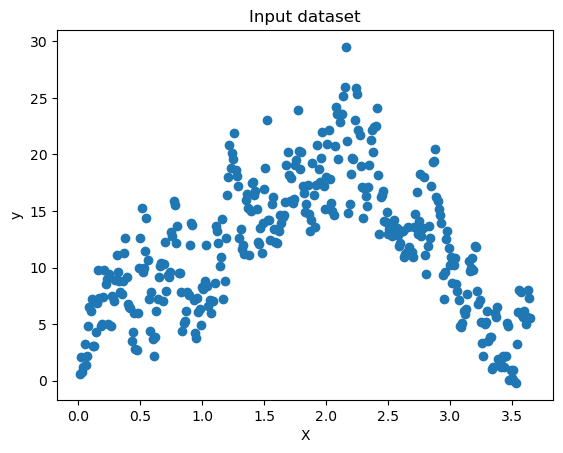

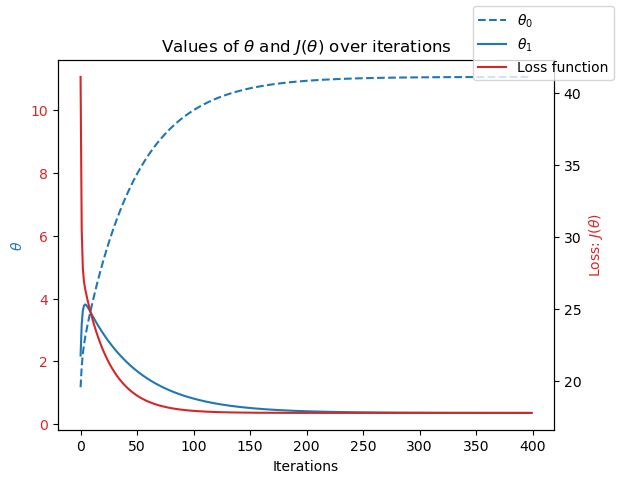

In [368]:
# Display the plot with the legend
plt.show()

In [369]:
%%time
# theta range
theta0_vals = np.linspace(0,12,100) #Look in the chart above for the limits of where theta0 and theta1 appear.
theta1_vals = np.linspace(0,7,100) #Put those values as the first two "linspace" numbers in these lines
                                      #Select with large margins, maybe +/- 10
J_vals = np.zeros((len(theta0_vals), len(theta1_vals)))

# compute cost for each combination of theta
c1=0; c2=0
for i in theta0_vals:
    for j in theta1_vals:
        t = np.array([i, j])
        J_vals[c1][c2] = compute_cost(X, y, t.transpose()).tolist()[0]
        c2=c2+1
    c1=c1+1
    c2=0 # reinitialize to 0

CPU times: total: 2.45 s
Wall time: 3.35 s


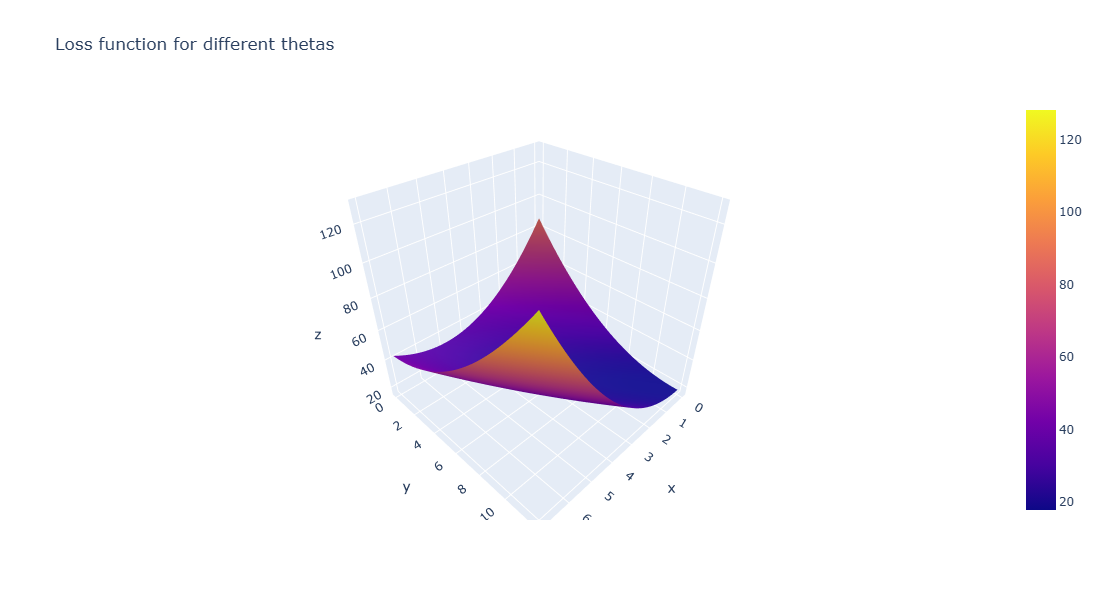

In [370]:
#This figure shows the loss function.

#X = Theta0
#Y - Theta1
#Z = Loss
#Find where it is closest to 0 in X and Y!

#you can click/hold in the graph below to rotate!

fig = go.Figure(data=[go.Surface(x=theta1_vals, y=theta0_vals, z=J_vals)])
fig.update_layout(title='Loss function for different thetas', autosize=True,
                  width=600, height=600, xaxis_title='theta0', 
                 yaxis_title='theta1')
fig.show()

### 4. look at a year of temperature data for one of the weather stations (DUSSELDORF 2019)

In [371]:
df3 = df[['DATE', 'MONTH','DUSSELDORF_cloud_cover','DUSSELDORF_wind_speed','DUSSELDORF_humidity','DUSSELDORF_pressure',
'DUSSELDORF_global_radiation','DUSSELDORF_precipitation','DUSSELDORF_snow_depth','DUSSELDORF_sunshine',
'DUSSELDORF_sunshine', 'DUSSELDORF_temp_mean', 'DUSSELDORF_temp_min','DUSSELDORF_temp_max']].copy()

In [372]:
# Drop the DATE and MONTH data as those numbers are not scaled with the rest
notemp = df3.drop(['DATE', 'MONTH'], axis = 1)

In [373]:
#Reduce your dataset to a single year
dfyear = df3[df3['DATE'].astype(str).str.contains('2019')] 
dfyear

DATE  MONTH  DUSSELDORF_cloud_cover  DUSSELDORF_wind_speed  \
21550  20190101      1                       7                    5.4   
21551  20190102      1                       5                    4.5   
21552  20190103      1                       7                    2.8   
21553  20190104      1                       8                    3.3   
21554  20190105      1                       8                    5.9   
...         ...    ...                     ...                    ...   
21910  20191227     12                       6                    2.7   
21911  20191228     12                       6                    3.1   
21912  20191229     12                       6                    5.1   
21913  20191230     12                       3                    5.3   
21914  20191231     12                       5                    1.7   

       DUSSELDORF_humidity  DUSSELDORF_pressure  DUSSELDORF_global_radiation  \
21550                 0.86               1.0297                         0.12   
21551                 0.72               1.0347                         0.29   
21552                 0.87               1.0386                         0.12   
21553                 0.95               1.0374                         0.12   
21554                 0.95               1.0313                         0.12   
...                    ...                  ...                          ...   
21910                 0.89               1.0266                         0.27   
21911                 0.84               1.0398                         0.31   
21912                 0.67               1.0379                         0.14   
21913                 0.50               1.0319                         0.46   
21914                 0.87               1.0332                         0.03   

       DUSSELDORF_precipitation  DUSSELDORF_snow_depth  DUSSELDORF_sunshine  \
21550                      0.25                      0                  0.0   
21551                      0.01                      0                  2.2   
21552                      0.02                      0                  0.0   
21553                      0.42                      0                  0.0   
21554                      0.22                      0                  0.0   
...                         ...                    ...                  ...   
21910                      0.00                      0                  1.9   
21911                      0.00                      0                  2.6   
21912                      0.00                      0                  0.2   
21913                      0.00                      0                  5.6   
21914                      0.01                      0                  0.0   

       DUSSELDORF_sunshine  DUSSELDORF_temp_mean  DUSSELDORF_temp_min  \
21550                  0.0                   6.9                  3.7   
21551                  2.2                   4.0                 -2.4   
21552                  0.0                   3.6                 -0.7   
21553                  0.0                   2.9                 -0.1   
21554                  0.0                   5.9                  4.0   
...                    ...                   ...                  ...   
21910                  1.9                   4.3                 -1.2   
21911                  2.6                   0.6                 -4.2   
21912                  0.2                   2.4                  0.1   
21913                  5.6                   4.6                  0.8   
21914                  0.0                   2.1                 -2.8   

       DUSSELDORF_temp_max  
21550                  8.4  
21551                  6.8  
21552                  5.2  
21553                  4.4  
21554                  6.9  
...                    ...  
21910                  6.2  
21911                  4.2  
21912                  4.4  
21913                  9.5  
21914                  5.0  

In [374]:
dfyear.describe()

DATE       MONTH  DUSSELDORF_cloud_cover  \
count  3.650000e+02  365.000000              365.000000   
mean   2.019067e+07    6.526027                5.235616   
std    3.454755e+02    3.452584                2.074000   
min    2.019010e+07    1.000000                0.000000   
25%    2.019040e+07    4.000000                4.000000   
50%    2.019070e+07    7.000000                6.000000   
75%    2.019100e+07   10.000000                7.000000   
max    2.019123e+07   12.000000                8.000000   

       DUSSELDORF_wind_speed  DUSSELDORF_humidity  DUSSELDORF_pressure  \
count             365.000000           365.000000           365.000000   
mean                4.183562             0.736658             1.015068   
std                 1.790943             0.128966             0.010570   
min                 1.400000             0.350000             0.979500   
25%                 2.900000             0.650000             1.008700   
50%                 3.800000             0.750000             1.015000   
75%                 5.200000             0.840000             1.022300   
max                 9.800000             0.980000             1.039800   

       DUSSELDORF_global_radiation  DUSSELDORF_precipitation  \
count                   365.000000                365.000000   
mean                      1.124822                  0.183644   
std                       0.883586                  0.336278   
min                       0.010000                  0.000000   
25%                       0.370000                  0.000000   
50%                       0.850000                  0.000000   
75%                       1.880000                  0.210000   
max                       3.100000                  2.560000   

       DUSSELDORF_snow_depth  DUSSELDORF_sunshine  DUSSELDORF_sunshine  \
count             365.000000           365.000000           365.000000   
mean                0.035616             4.750411             4.750411   
std                 0.341848             4.443817             4.443817   
min                 0.000000             0.000000             0.000000   
25%                 0.000000             0.400000             0.400000   
50%                 0.000000             3.900000             3.900000   
75%                 0.000000             8.000000             8.000000   
max                 4.000000            15.400000            15.400000   

       DUSSELDORF_temp_mean  DUSSELDORF_temp_min  DUSSELDORF_temp_max  
count            365.000000           365.000000           365.000000  
mean              11.866575             6.999452            16.439452  
std                6.698198             5.842559             8.053105  
min               -3.500000            -8.500000            -2.400000  
25%                6.800000             2.700000            10.200000  
50%               10.900000             6.500000            16.000000  
75%               16.800000            11.500000            22.500000  
max               31.200000            20.900000            40.700000

In [375]:
#Drop the DATE and MONTH data as those numbers are not scaled with the rest
notempyear = dfyear.drop(['DATE','MONTH'], axis=1)

In [376]:
#We need to make an index for the year. Create a set of data from 1 to 365 (or to 366 if it's a leap year!)
#We'll scale this by 100 as the index is made. This will help teh gradient descent converge 366 = 3.66
i = np.arange(0.01,3.66,0.01) #<---needs to be one GREATER than the total number of days
index = pd.DataFrame(data = i, columns = ['index'])
index

index
0     0.01
1     0.02
2     0.03
3     0.04
4     0.05
..     ...
360   3.61
361   3.62
362   3.63
363   3.64
364   3.65

[365 rows x 1 columns]

In [377]:
n_rows = dfyear.shape[0]
n_rows

365

In [378]:
#This will translate your chosen weather data into the X and y datasets needed for the optimization function.

X=index.to_numpy().reshape(n_rows,1)
#Represent x_0 as a vector of 1s for vector computation
ones = np.ones((n_rows,1))
X = np.concatenate((ones, X), axis=1)
y=dfyear['DUSSELDORF_temp_mean'].to_numpy().reshape(n_rows,1) 

In [379]:
#Look at one year of temperature data over time
plt.scatter(x=index['index'], y=dfyear['DUSSELDORF_temp_mean']) 
plt.xlabel('X'); plt.ylabel('y');
plt.title('Input dataset');

In [380]:
#what is the min temperature? (Note gradient descent is not actually finding this number)
dfyear['DUSSELDORF_temp_mean'].min()

-3.5

In [381]:
#what is the max temperature? (Note gradient descent is not actually finding this number)
dfyear['DUSSELDORF_temp_mean'].max()

31.2

In [382]:
#This computes the loss function for the gradiant descent. DO NOT CHANGE!

def compute_cost(X, y, theta=np.array([[0],[0]])):
    """Given covariate matrix X, the prediction results y and coefficients theta
    compute the loss"""
    
    m = len(y)
    J=0 # initialize loss to zero
    
    # reshape theta
    theta=theta.reshape(2,1)
    
    # calculate the hypothesis - y_hat
    h_x = np.dot(X,theta)
    #print(h_x)
    
    # subtract y from y_hat, square and sum
    error_term = sum((h_x - y)**2)
    
    # divide by twice the number of samples - standard practice.
    loss = error_term/(2*m)
    
    return loss

In [383]:
#This is the gradiant descent function. DO NOT CHANGE!

def gradient_descent(X, y, theta=np.array([[0],[0]]),
                    alpha=0.01, num_iterations=1500):
    """
    Solve for theta using Gradient Descent optimiztion technique. 
    Alpha is the learning rate
    """
    m = len(y)
    J_history = []
    theta0_history = []
    theta1_history = []
    theta = theta.reshape(2,1)
    
    for i in range(num_iterations):
        error = (np.dot(X, theta) - y)
        
        term0 = (alpha/m) * sum(error* X[:,0].reshape(m,1))
        term1 = (alpha/m) * sum(error* X[:,1].reshape(m,1))
        
        # update theta
        term_vector = np.array([[term0],[term1]])
        #print(term_vector)
        theta = theta - term_vector.reshape(2,1)
        
        # store history values
        theta0_history.append(theta[0].tolist()[0])
        theta1_history.append(theta[1].tolist()[0])
        J_history.append(compute_cost(X,y,theta).tolist()[0])
        
    return (theta, J_history, theta0_history, theta1_history)

In [384]:
%%time
#This runs your data through a gradiant descent for the starting conditions in 'theta_init.'
#You will need to adjust these numbers

num_iterations=600 #<---Decide how many iterations you need. Start small and work up. Over 10,000 iterations will take a few seconds.
theta_init=np.array([[0],[0]]) #<---this is where you put the guess for [theta0], [theta1]. Start with 1 and 1.
alpha=0.01#<---Decide what your step size is. Try values between 0.1 and 0.00001. You will need to adjust your iterations.
#If your solution is not converging, try a smaller step size.
theta, J_history, theta0_history, theta1_history = gradient_descent(X,y, theta_init,
                                                                   alpha, num_iterations)

CPU times: total: 328 ms
Wall time: 725 ms


In [385]:
#This will plot your loss, theta0, and theta1.If the result looks like a straight line, it's not converging on an answer!
#Your loss (red) should be trending toward 0.

fig, ax1 = plt.subplots()

# plot thetas over time
color='tab:blue'
ax1.plot(theta0_history, label='$\\theta_{0}$', linestyle='--', color=color)
ax1.plot(theta1_history, label='$\\theta_{1}$', linestyle='-', color=color)
# ax1.legend()
ax1.set_xlabel('Iterations'); ax1.set_ylabel('$\\theta$', color=color);
ax1.tick_params(axis='y', labelcolor=color)

# plot loss function over time
color='tab:red'
ax2 = ax1.twinx()
ax2.plot(J_history, label='Loss function', color=color)
ax2.set_title('Values of $\\theta$ and $J(\\theta)$ over iterations')
ax2.set_ylabel('Loss: $J(\\theta)$', color=color)
ax1.tick_params(axis='y', labelcolor=color)

# ax2.legend();
fig.legend();

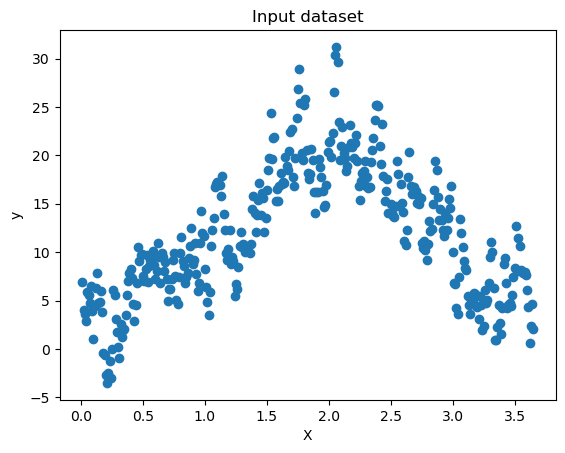

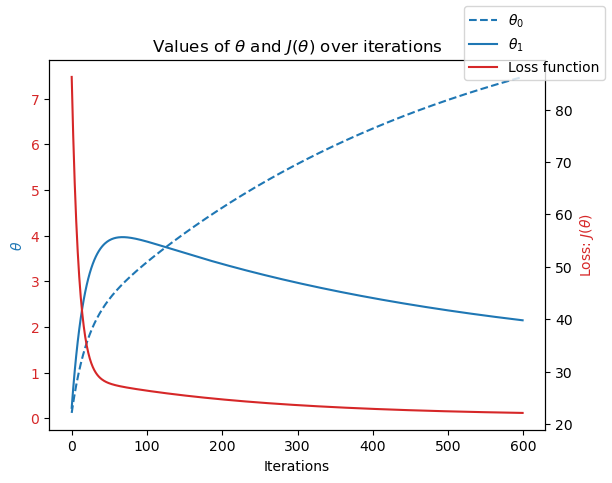

In [386]:
# Display the plot with the legend
plt.show()

In [387]:
%%time
# theta range
theta0_vals = np.linspace(-1,10,100) #Look in the chart above for the limits of where theta0 and theta1 appear.
theta1_vals = np.linspace(-1,5,100) #Put those values as the first two "linspace" numbers in these lines
                                      #Select with large margins, maybe +/- 10
J_vals = np.zeros((len(theta0_vals), len(theta1_vals)))

# compute cost for each combination of theta
c1=0; c2=0
for i in theta0_vals:
    for j in theta1_vals:
        t = np.array([i, j])
        J_vals[c1][c2] = compute_cost(X, y, t.transpose()).tolist()[0]
        c2=c2+1
    c1=c1+1
    c2=0 # reinitialize to 0

CPU times: total: 2.16 s
Wall time: 3.38 s


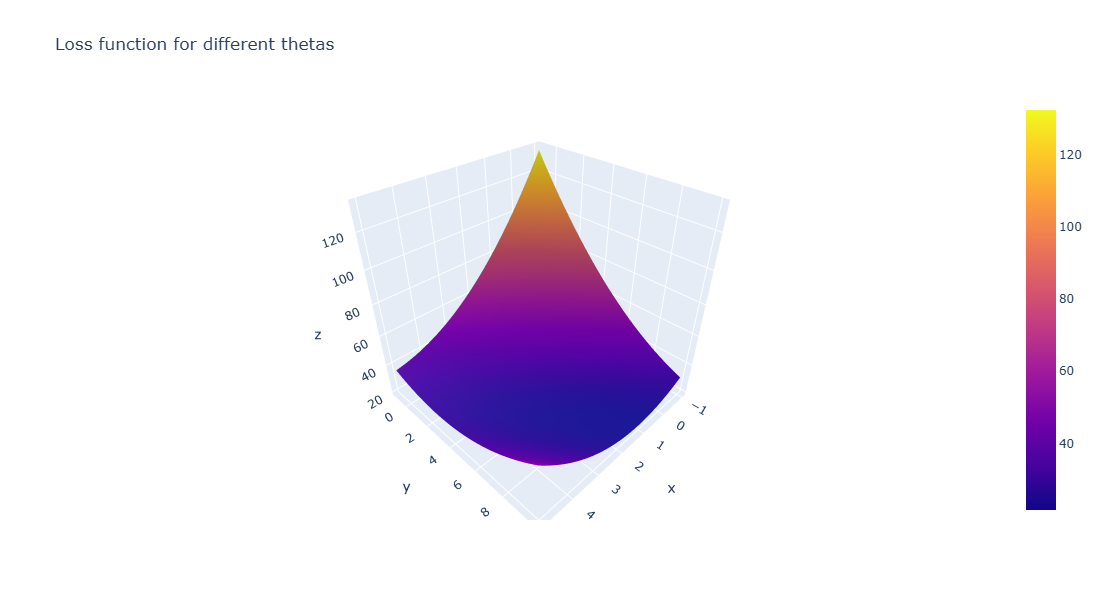

In [388]:
#This figure shows the loss function.

#X = Theta0
#Y - Theta1
#Z = Loss
#Find where it is closest to 0 in X and Y!

#you can click/hold in the graph below to rotate!

fig = go.Figure(data=[go.Surface(x=theta1_vals, y=theta0_vals, z=J_vals)])
fig.update_layout(title='Loss function for different thetas', autosize=True,
                  width=600, height=600, xaxis_title='theta0', 
                 yaxis_title='theta1')
fig.show()

### 5. look at a year of temperature data for one of the weather stations (BASEL 1961)

In [389]:
df4 = df[['DATE', 'MONTH','BASEL_cloud_cover','BASEL_wind_speed','BASEL_humidity','BASEL_pressure',
'BASEL_global_radiation','BASEL_precipitation','BASEL_snow_depth','BASEL_sunshine',
 'BASEL_sunshine', 'BASEL_temp_mean', 'BASEL_temp_min','BASEL_temp_max']].copy()

In [390]:
# Drop the DATE and MONTH data as those numbers are not scaled with the rest
notemp = df4.drop(['DATE', 'MONTH'], axis = 1)

In [391]:
#Reduce your dataset to a single year
dfyear = df4[df4['DATE'].astype(str).str.contains('1961')] 
dfyear

DATE  MONTH  BASEL_cloud_cover  BASEL_wind_speed  BASEL_humidity  \
366  19610101      1                  8               2.1            0.97   
367  19610102      1                  8               2.1            0.88   
368  19610103      1                  8               2.1            0.78   
369  19610104      1                  7               2.1            0.70   
370  19610105      1                  7               2.1            0.88   
..        ...    ...                ...               ...             ...   
726  19611227     12                  8               2.1            1.00   
727  19611228     12                  8               2.1            1.00   
728  19611229     12                  2               2.1            0.95   
729  19611230     12                  7               2.1            0.92   
730  19611231     12                  7               2.1            0.77   

     BASEL_pressure  BASEL_global_radiation  BASEL_precipitation  \
366           1.018                    0.18                 0.21   
367           1.018                    0.18                 0.16   
368           1.018                    0.18                 0.38   
369           1.018                    0.34                 0.26   
370           1.018                    0.27                 0.00   
..              ...                     ...                  ...   
726           1.018                    0.18                 0.00   
727           1.018                    0.18                 0.00   
728           1.018                    0.55                 0.00   
729           1.018                    0.35                 0.00   
730           1.018                    0.51                 0.38   

     BASEL_snow_depth  BASEL_sunshine  BASEL_sunshine  BASEL_temp_mean  \
366                 0             0.0             0.0              1.1   
367                 0             0.0             0.0              4.4   
368                 0             0.0             0.0              4.9   
369                 0             0.8             0.8              4.2   
370                 0             0.3             0.3              1.7   
..                ...             ...             ...              ...   
726                 1             0.0             0.0             -3.8   
727                 1             0.0             0.0             -0.9   
728                 1             4.0             4.0             -0.1   
729                 1             1.0             1.0              0.8   
730                 0             3.1             3.1              6.5   

     BASEL_temp_min  BASEL_temp_max  
366            -0.2             2.1  
367            -1.0             7.5  
368             2.4            12.8  
369             1.1             6.8  
370             0.5             5.3  
..              ...             ...  
726            -4.6            -1.8  
727            -3.7             0.5  
728            -0.8             1.3  
729            -1.4             2.3  
730             1.6            16.8  

[365 rows x 14 columns]

In [392]:
dfyear.describe()

DATE       MONTH  BASEL_cloud_cover  BASEL_wind_speed  \
count  3.650000e+02  365.000000         365.000000      3.650000e+02   
mean   1.961067e+07    6.526027           5.109589      2.100000e+00   
std    3.454755e+02    3.452584           2.540667      1.378566e-14   
min    1.961010e+07    1.000000           0.000000      2.100000e+00   
25%    1.961040e+07    4.000000           3.000000      2.100000e+00   
50%    1.961070e+07    7.000000           5.000000      2.100000e+00   
75%    1.961100e+07   10.000000           7.000000      2.100000e+00   
max    1.961123e+07   12.000000           8.000000      2.100000e+00   

       BASEL_humidity  BASEL_pressure  BASEL_global_radiation  \
count      365.000000    3.650000e+02              365.000000   
mean         0.795671    1.018000e+00                1.449644   
std          0.098214    8.226928e-15                0.958333   
min          0.530000    1.018000e+00                0.170000   
25%          0.730000    1.018000e+00                0.570000   
50%          0.790000    1.018000e+00                1.340000   
75%          0.870000    1.018000e+00                2.120000   
max          1.000000    1.018000e+00                3.550000   

       BASEL_precipitation  BASEL_snow_depth  BASEL_sunshine  BASEL_sunshine  \
count           365.000000        365.000000      365.000000      365.000000   
mean              0.200603          0.021918        5.086027        5.086027   
std               0.407895          0.164289        4.305344        4.305344   
min               0.000000          0.000000        0.000000        0.000000   
25%               0.000000          0.000000        0.800000        0.800000   
50%               0.000000          0.000000        4.500000        4.500000   
75%               0.220000          0.000000        8.700000        8.700000   
max               2.620000          2.000000       14.400000       14.400000   

       BASEL_temp_mean  BASEL_temp_min  BASEL_temp_max  
count       365.000000      365.000000      365.000000  
mean         10.533425        6.410685       16.369041  
std           6.975107        5.998958        8.709468  
min          -9.700000      -12.200000       -6.200000  
25%           5.400000        1.700000       10.300000  
50%          11.400000        7.200000       17.500000  
75%          15.800000       11.100000       22.500000  
max          24.600000       17.000000       32.800000

In [393]:
#Drop the DATE and MONTH data as those numbers are not scaled with the rest
notempyear = dfyear.drop(['DATE','MONTH'], axis=1)

In [394]:
#We need to make an index for the year. Create a set of data from 1 to 365 (or to 366 if it's a leap year!)
#We'll scale this by 100 as the index is made. This will help teh gradient descent converge 366 = 3.66
i = np.arange(0.01,3.66,0.01) #<---needs to be one GREATER than the total number of days
index = pd.DataFrame(data = i, columns = ['index'])
index

index
0     0.01
1     0.02
2     0.03
3     0.04
4     0.05
..     ...
360   3.61
361   3.62
362   3.63
363   3.64
364   3.65

[365 rows x 1 columns]

In [395]:
n_rows = dfyear.shape[0]
n_rows

365

In [396]:
#This will translate your chosen weather data into the X and y datasets needed for the optimization function.

X=index.to_numpy().reshape(n_rows,1)
#Represent x_0 as a vector of 1s for vector computation
ones = np.ones((n_rows,1))
X = np.concatenate((ones, X), axis=1)
y=dfyear['BASEL_temp_mean'].to_numpy().reshape(n_rows,1) 

In [397]:
#what is the min temperature? (Note gradient descent is not actually finding this number)
dfyear['BASEL_temp_mean'].min()

-9.7

In [398]:
#what is the max temperature? (Note gradient descent is not actually finding this number)
dfyear['BASEL_temp_mean'].max()

24.6

In [399]:
#This computes the loss function for the gradiant descent. DO NOT CHANGE!

def compute_cost(X, y, theta=np.array([[0],[0]])):
    """Given covariate matrix X, the prediction results y and coefficients theta
    compute the loss"""
    
    m = len(y)
    J=0 # initialize loss to zero
    
    # reshape theta
    theta=theta.reshape(2,1)
    
    # calculate the hypothesis - y_hat
    h_x = np.dot(X,theta)
    #print(h_x)
    
    # subtract y from y_hat, square and sum
    error_term = sum((h_x - y)**2)
    
    # divide by twice the number of samples - standard practice.
    loss = error_term/(2*m)
    
    return loss

In [400]:
#This is the gradiant descent function. DO NOT CHANGE!

def gradient_descent(X, y, theta=np.array([[0],[0]]),
                    alpha=0.01, num_iterations=1500):
    """
    Solve for theta using Gradient Descent optimiztion technique. 
    Alpha is the learning rate
    """
    m = len(y)
    J_history = []
    theta0_history = []
    theta1_history = []
    theta = theta.reshape(2,1)
    
    for i in range(num_iterations):
        error = (np.dot(X, theta) - y)
        
        term0 = (alpha/m) * sum(error* X[:,0].reshape(m,1))
        term1 = (alpha/m) * sum(error* X[:,1].reshape(m,1))
        
        # update theta
        term_vector = np.array([[term0],[term1]])
        #print(term_vector)
        theta = theta - term_vector.reshape(2,1)
        
        # store history values
        theta0_history.append(theta[0].tolist()[0])
        theta1_history.append(theta[1].tolist()[0])
        J_history.append(compute_cost(X,y,theta).tolist()[0])
        
    return (theta, J_history, theta0_history, theta1_history)

In [401]:
%%time
#This runs your data through a gradiant descent for the starting conditions in 'theta_init.'
#You will need to adjust these numbers

num_iterations=300 #<---Decide how many iterations you need. Start small and work up. Over 10,000 iterations will take a few seconds.
theta_init=np.array([[0],[0]]) #<---this is where you put the guess for [theta0], [theta1]. Start with 1 and 1.
alpha=0.01#<---Decide what your step size is. Try values between 0.1 and 0.00001. You will need to adjust your iterations.
#If your solution is not converging, try a smaller step size.
theta, J_history, theta0_history, theta1_history = gradient_descent(X,y, theta_init,
                                                                   alpha, num_iterations)

CPU times: total: 203 ms
Wall time: 448 ms


In [402]:
#This will plot your loss, theta0, and theta1.If the result looks like a straight line, it's not converging on an answer!
#Your loss (red) should be trending toward 0.

fig, ax1 = plt.subplots()

# plot thetas over time
color='tab:blue'
ax1.plot(theta0_history, label='$\\theta_{0}$', linestyle='--', color=color)
ax1.plot(theta1_history, label='$\\theta_{1}$', linestyle='-', color=color)
# ax1.legend()
ax1.set_xlabel('Iterations'); ax1.set_ylabel('$\\theta$', color=color);
ax1.tick_params(axis='y', labelcolor=color)

# plot loss function over time
color='tab:red'
ax2 = ax1.twinx()
ax2.plot(J_history, label='Loss function', color=color)
ax2.set_title('Values of $\\theta$ and $J(\\theta)$ over iterations')
ax2.set_ylabel('Loss: $J(\\theta)$', color=color)
ax1.tick_params(axis='y', labelcolor=color)

# ax2.legend();
fig.legend();

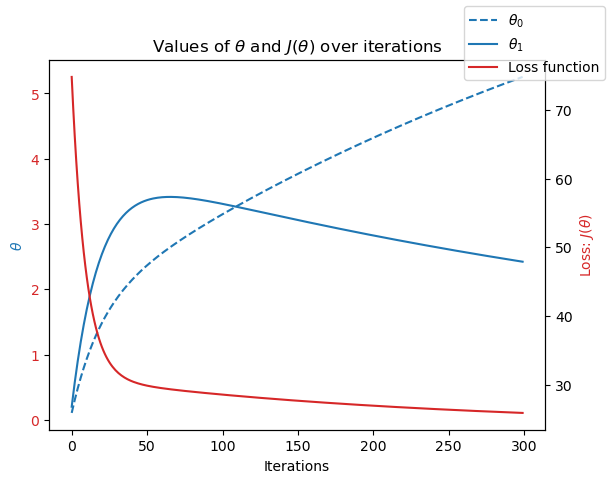

In [403]:
# Display the plot with the legend
plt.show()

In [404]:
%%time
# theta range
theta0_vals = np.linspace(-.1,7,100) #Look in the chart above for the limits of where theta0 and theta1 appear.
theta1_vals = np.linspace(-.1,5,100) #Put those values as the first two "linspace" numbers in these lines
                                      #Select with large margins, maybe +/- 10
J_vals = np.zeros((len(theta0_vals), len(theta1_vals)))

# compute cost for each combination of theta
c1=0; c2=0
for i in theta0_vals:
    for j in theta1_vals:
        t = np.array([i, j])
        J_vals[c1][c2] = compute_cost(X, y, t.transpose()).tolist()[0]
        c2=c2+1
    c1=c1+1
    c2=0 # reinitialize to 0

CPU times: total: 1.8 s
Wall time: 3.78 s


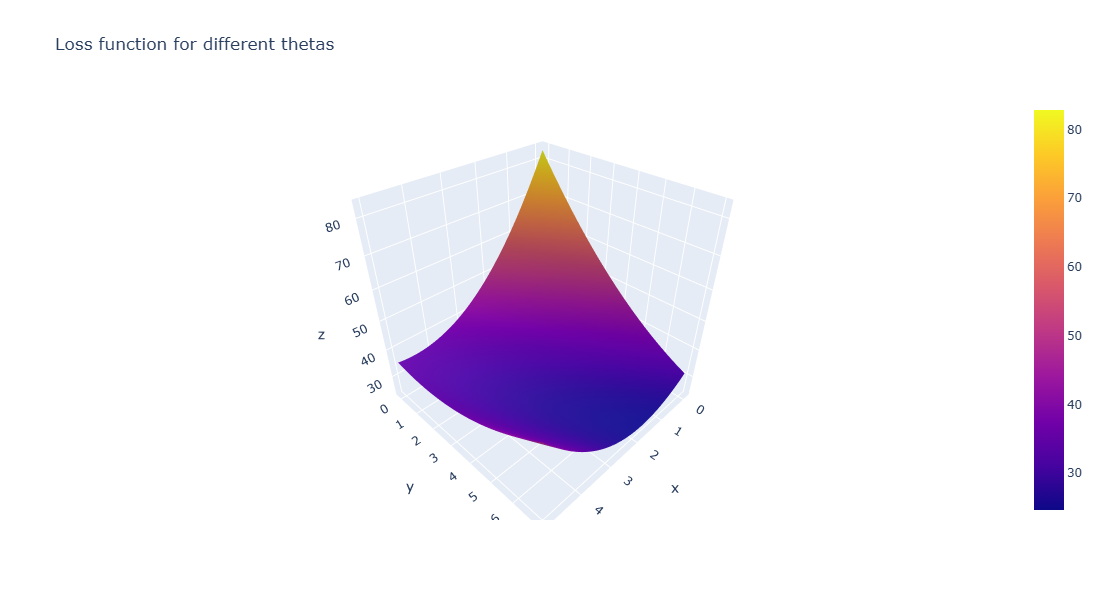

In [405]:
#This figure shows the loss function.

#X = Theta0
#Y - Theta1
#Z = Loss
#Find where it is closest to 0 in X and Y!

#you can click/hold in the graph below to rotate!

fig = go.Figure(data=[go.Surface(x=theta1_vals, y=theta0_vals, z=J_vals)])
fig.update_layout(title='Loss function for different thetas', autosize=True,
                  width=600, height=600, xaxis_title='theta0', 
                 yaxis_title='theta1')
fig.show()

### 6. look at a year of temperature data for one of the weather stations (BASEL 1990)

In [406]:
#Reduce your dataset to a single year
dfyear = df4[df4['DATE'].astype(str).str.contains('1990')] 
dfyear

DATE  MONTH  BASEL_cloud_cover  BASEL_wind_speed  BASEL_humidity  \
10958  19900101      1                  0               2.1            0.83   
10959  19900102      1                  2               2.1            0.84   
10960  19900103      1                  8               2.1            0.89   
10961  19900104      1                  2               2.1            0.77   
10962  19900105      1                  7               2.1            0.81   
...         ...    ...                ...               ...             ...   
11318  19901227     12                  7               6.3            0.72   
11319  19901228     12                  3               2.7            0.71   
11320  19901229     12                  7               4.9            0.70   
11321  19901230     12                  8               3.1            0.74   
11322  19901231     12                  8               2.5            0.94   

       BASEL_pressure  BASEL_global_radiation  BASEL_precipitation  \
10958          1.0217                    0.60                 0.00   
10959          1.0238                    0.48                 0.00   
10960          1.0231                    0.20                 0.00   
10961          1.0265                    0.54                 0.00   
10962          1.0286                    0.23                 0.04   
...               ...                     ...                  ...   
11318          1.0118                    0.34                 0.12   
11319          1.0211                    0.60                 0.02   
11320          1.0163                    0.16                 0.51   
11321          1.0221                    0.12                 0.51   
11322          1.0206                    0.13                 0.72   

       BASEL_snow_depth  BASEL_sunshine  BASEL_sunshine  BASEL_temp_mean  \
10958                 0             7.2             7.2             -2.1   
10959                 0             2.3             2.3             -1.8   
10960                 0             0.0             0.0             -2.2   
10961                 0             5.6             5.6             -0.7   
10962                 0             0.2             0.2              0.0   
...                 ...             ...             ...              ...   
11318                 0             1.6             1.6              6.6   
11319                 0             6.6             6.6              3.8   
11320                 0             0.1             0.1             10.3   
11321                 0             0.0             0.0             12.0   
11322                 0             0.0             0.0              8.2   

       BASEL_temp_min  BASEL_temp_max  
10958            -3.6             1.2  
10959            -3.9             1.7  
10960            -4.2             0.4  
10961            -3.1             2.2  
10962            -3.1             2.6  
...               ...             ...  
11318             1.8            10.5  
11319             1.6             6.9  
11320             3.9            15.9  
11321             8.3            15.5  
11322             7.4             9.3  

[365 rows x 14 columns]

In [407]:
dfyear.describe()

DATE       MONTH  BASEL_cloud_cover  BASEL_wind_speed  \
count  3.650000e+02  365.000000         365.000000        365.000000   
mean   1.990067e+07    6.526027           5.030137          2.130137   
std    3.454755e+02    3.452584           2.616867          0.542148   
min    1.990010e+07    1.000000           0.000000          0.300000   
25%    1.990040e+07    4.000000           3.000000          2.100000   
50%    1.990070e+07    7.000000           6.000000          2.100000   
75%    1.990100e+07   10.000000           7.000000          2.100000   
max    1.990123e+07   12.000000           8.000000          7.700000   

       BASEL_humidity  BASEL_pressure  BASEL_global_radiation  \
count      365.000000      365.000000              365.000000   
mean         0.739808        1.019227                1.302493   
std          0.106633        0.008428                0.898836   
min          0.430000        0.988600                0.120000   
25%          0.670000        1.014000                0.520000   
50%          0.740000        1.019200                1.130000   
75%          0.820000        1.023900                1.960000   
max          0.950000        1.044700                3.290000   

       BASEL_precipitation  BASEL_snow_depth  BASEL_sunshine  BASEL_sunshine  \
count           365.000000        365.000000      365.000000      365.000000   
mean              0.223151          0.347945        5.069315        5.069315   
std               0.475542          1.825349        4.412992        4.412992   
min               0.000000          0.000000        0.000000        0.000000   
25%               0.000000          0.000000        0.800000        0.800000   
50%               0.000000          0.000000        4.500000        4.500000   
75%               0.240000          0.000000        8.500000        8.500000   
max               3.220000         16.000000       14.500000       14.500000   

       BASEL_temp_mean  BASEL_temp_min  BASEL_temp_max  
count       365.000000      365.000000      365.000000  
mean         10.914247        6.539726       15.881918  
std           6.635710        5.557975        8.223719  
min          -3.000000       -6.200000       -0.900000  
25%           6.100000        2.300000       10.000000  
50%          11.200000        6.800000       16.700000  
75%          15.800000       11.000000       22.100000  
max          25.100000       18.200000       34.300000

In [408]:
#Drop the DATE and MONTH data as those numbers are not scaled with the rest
notempyear = dfyear.drop(['DATE','MONTH'], axis=1)

In [409]:
#We need to make an index for the year. Create a set of data from 1 to 365 (or to 366 if it's a leap year!)
#We'll scale this by 100 as the index is made. This will help teh gradient descent converge 366 = 3.66
i = np.arange(0.01,3.66,0.01) #<---needs to be one GREATER than the total number of days
index = pd.DataFrame(data = i, columns = ['index'])
index

index
0     0.01
1     0.02
2     0.03
3     0.04
4     0.05
..     ...
360   3.61
361   3.62
362   3.63
363   3.64
364   3.65

[365 rows x 1 columns]

In [410]:
n_rows = dfyear.shape[0]
n_rows

365

In [411]:
#This will translate your chosen weather data into the X and y datasets needed for the optimization function.

X=index.to_numpy().reshape(n_rows,1)
#Represent x_0 as a vector of 1s for vector computation
ones = np.ones((n_rows,1))
X = np.concatenate((ones, X), axis=1)
y=dfyear['BASEL_temp_mean'].to_numpy().reshape(n_rows,1) 

In [412]:
#what is the min temperature? (Note gradient descent is not actually finding this number)
dfyear['BASEL_temp_mean'].min()

-3.0

In [413]:
#what is the max temperature? (Note gradient descent is not actually finding this number)
dfyear['BASEL_temp_mean'].max()

25.1

In [414]:
#This computes the loss function for the gradiant descent. DO NOT CHANGE!

def compute_cost(X, y, theta=np.array([[0],[0]])):
    """Given covariate matrix X, the prediction results y and coefficients theta
    compute the loss"""
    
    m = len(y)
    J=0 # initialize loss to zero
    
    # reshape theta
    theta=theta.reshape(2,1)
    
    # calculate the hypothesis - y_hat
    h_x = np.dot(X,theta)
    #print(h_x)
    
    # subtract y from y_hat, square and sum
    error_term = sum((h_x - y)**2)
    
    # divide by twice the number of samples - standard practice.
    loss = error_term/(2*m)
    
    return loss

In [415]:
#This is the gradiant descent function. DO NOT CHANGE!

def gradient_descent(X, y, theta=np.array([[0],[0]]),
                    alpha=0.01, num_iterations=1500):
    """
    Solve for theta using Gradient Descent optimiztion technique. 
    Alpha is the learning rate
    """
    m = len(y)
    J_history = []
    theta0_history = []
    theta1_history = []
    theta = theta.reshape(2,1)
    
    for i in range(num_iterations):
        error = (np.dot(X, theta) - y)
        
        term0 = (alpha/m) * sum(error* X[:,0].reshape(m,1))
        term1 = (alpha/m) * sum(error* X[:,1].reshape(m,1))
        
        # update theta
        term_vector = np.array([[term0],[term1]])
        #print(term_vector)
        theta = theta - term_vector.reshape(2,1)
        
        # store history values
        theta0_history.append(theta[0].tolist()[0])
        theta1_history.append(theta[1].tolist()[0])
        J_history.append(compute_cost(X,y,theta).tolist()[0])
        
    return (theta, J_history, theta0_history, theta1_history)

In [416]:
%%time
#This runs your data through a gradiant descent for the starting conditions in 'theta_init.'
#You will need to adjust these numbers

num_iterations=400 #<---Decide how many iterations you need. Start small and work up. Over 10,000 iterations will take a few seconds.
theta_init=np.array([[0],[0]]) #<---this is where you put the guess for [theta0], [theta1]. Start with 1 and 1.
alpha=0.1#<---Decide what your step size is. Try values between 0.1 and 0.00001. You will need to adjust your iterations.
#If your solution is not converging, try a smaller step size.
theta, J_history, theta0_history, theta1_history = gradient_descent(X,y, theta_init,
                                                                   alpha, num_iterations)

CPU times: total: 281 ms
Wall time: 583 ms


In [417]:
#This will plot your loss, theta0, and theta1.If the result looks like a straight line, it's not converging on an answer!
#Your loss (red) should be trending toward 0.

fig, ax1 = plt.subplots()

# plot thetas over time
color='tab:blue'
ax1.plot(theta0_history, label='$\\theta_{0}$', linestyle='--', color=color)
ax1.plot(theta1_history, label='$\\theta_{1}$', linestyle='-', color=color)
# ax1.legend()
ax1.set_xlabel('Iterations'); ax1.set_ylabel('$\\theta$', color=color);
ax1.tick_params(axis='y', labelcolor=color)

# plot loss function over time
color='tab:red'
ax2 = ax1.twinx()
ax2.plot(J_history, label='Loss function', color=color)
ax2.set_title('Values of $\\theta$ and $J(\\theta)$ over iterations')
ax2.set_ylabel('Loss: $J(\\theta)$', color=color)
ax1.tick_params(axis='y', labelcolor=color)

# ax2.legend();
fig.legend();

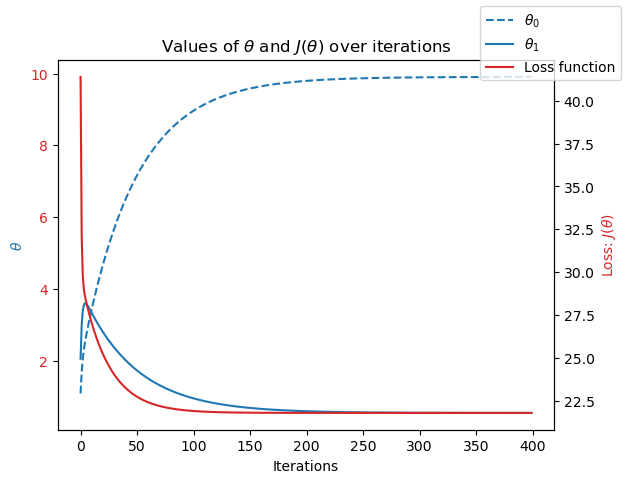

In [418]:
# Display the plot with the legend
plt.show()

In [419]:
%%time
# theta range
theta0_vals = np.linspace(0,12,100) #Look in the chart above for the limits of where theta0 and theta1 appear.
theta1_vals = np.linspace(0,5,100) #Put those values as the first two "linspace" numbers in these lines
                                      #Select with large margins, maybe +/- 10
J_vals = np.zeros((len(theta0_vals), len(theta1_vals)))

# compute cost for each combination of theta
c1=0; c2=0
for i in theta0_vals:
    for j in theta1_vals:
        t = np.array([i, j])
        J_vals[c1][c2] = compute_cost(X, y, t.transpose()).tolist()[0]
        c2=c2+1
    c1=c1+1
    c2=0 # reinitialize to 0

CPU times: total: 2.22 s
Wall time: 3 s


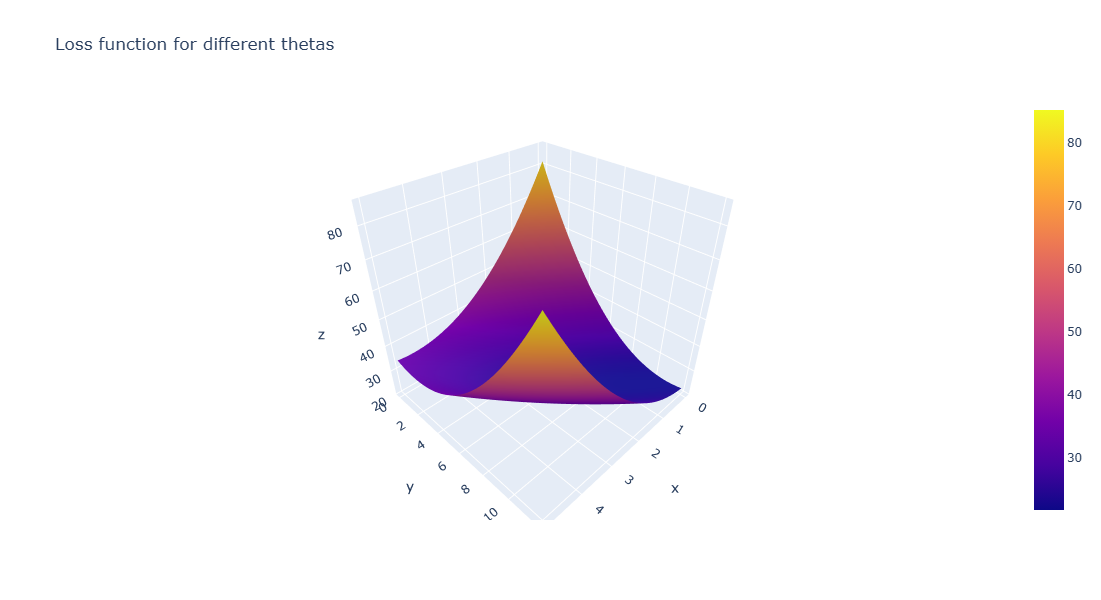

In [420]:
#This figure shows the loss function.

#X = Theta0
#Y - Theta1
#Z = Loss
#Find where it is closest to 0 in X and Y!

#you can click/hold in the graph below to rotate!

fig = go.Figure(data=[go.Surface(x=theta1_vals, y=theta0_vals, z=J_vals)])
fig.update_layout(title='Loss function for different thetas', autosize=True,
                  width=600, height=600, xaxis_title='theta0', 
                 yaxis_title='theta1')
fig.show()

### 7. look at a year of temperature data for one of the weather stations (BASEL 2019)

In [421]:
#Reduce your dataset to a single year
dfyear = df4[df4['DATE'].astype(str).str.contains('2019')] 
dfyear

DATE  MONTH  BASEL_cloud_cover  BASEL_wind_speed  BASEL_humidity  \
21550  20190101      1                  6               2.5            0.86   
21551  20190102      1                  7               2.0            0.69   
21552  20190103      1                  3               0.8            0.71   
21553  20190104      1                  4               1.1            0.79   
21554  20190105      1                  8               1.6            0.82   
...         ...    ...                ...               ...             ...   
21910  20191227     12                  8               1.5            0.92   
21911  20191228     12                  7               1.9            0.86   
21912  20191229     12                  6               1.1            0.93   
21913  20191230     12                  1               1.8            0.81   
21914  20191231     12                  5               2.9            0.87   

       BASEL_pressure  BASEL_global_radiation  BASEL_precipitation  \
21550          1.0333                    0.77                 0.07   
21551          1.0357                    0.33                 0.01   
21552          1.0393                    0.76                 0.00   
21553          1.0382                    0.74                 0.00   
21554          1.0346                    0.50                 0.04   
...               ...                     ...                  ...   
21910          1.0273                    0.15                 0.52   
21911          1.0380                    0.35                 0.00   
21912          1.0387                    0.61                 0.00   
21913          1.0354                    0.64                 0.00   
21914          1.0350                    0.58                 0.00   

       BASEL_snow_depth  BASEL_sunshine  BASEL_sunshine  BASEL_temp_mean  \
21550                 0             0.0             0.0              5.0   
21551                 0             0.1             0.1              3.3   
21552                 0             5.1             5.1             -0.3   
21553                 0             5.3             5.3             -0.1   
21554                 0             0.0             0.0              2.1   
...                 ...             ...             ...              ...   
21910                 0             0.1             0.1              6.8   
21911                 0             1.3             1.3              3.7   
21912                 0             4.9             4.9             -0.8   
21913                 0             6.5             6.5              0.5   
21914                 0             3.5             3.5              0.4   

       BASEL_temp_min  BASEL_temp_max  
21550             1.9             5.9  
21551             0.3             5.3  
21552            -3.6             2.3  
21553            -3.5             3.0  
21554             0.4             3.5  
...               ...             ...  
21910             5.6             7.9  
21911            -0.6             5.7  
21912            -2.7             2.6  
21913            -3.0             5.1  
21914            -1.3             3.5  

[365 rows x 14 columns]

In [422]:
dfyear.describe()

DATE       MONTH  BASEL_cloud_cover  BASEL_wind_speed  \
count  3.650000e+02  365.000000         365.000000        365.000000   
mean   2.019067e+07    6.526027           5.219178          1.981096   
std    3.454755e+02    3.452584           2.326664          1.007471   
min    2.019010e+07    1.000000           0.000000          0.600000   
25%    2.019040e+07    4.000000           4.000000          1.300000   
50%    2.019070e+07    7.000000           6.000000          1.700000   
75%    2.019100e+07   10.000000           7.000000          2.300000   
max    2.019123e+07   12.000000           8.000000          6.500000   

       BASEL_humidity  BASEL_pressure  BASEL_global_radiation  \
count      365.000000      365.000000              365.000000   
mean         0.722356        1.016973                1.303836   
std          0.119828        0.008814                0.882313   
min          0.420000        0.989700                0.130000   
25%          0.640000        1.012100                0.460000   
50%          0.730000        1.016800                1.070000   
75%          0.820000        1.021700                2.070000   
max          0.950000        1.039300                3.130000   

       BASEL_precipitation  BASEL_snow_depth  BASEL_sunshine  BASEL_sunshine  \
count           365.000000        365.000000      365.000000      365.000000   
mean              0.215288          0.041096        5.305205        5.305205   
std               0.465027          0.341231        4.627563        4.627563   
min               0.000000          0.000000        0.000000        0.000000   
25%               0.000000          0.000000        0.700000        0.700000   
50%               0.000000          0.000000        4.500000        4.500000   
75%               0.210000          0.000000        9.200000        9.200000   
max               2.960000          4.000000       15.000000       15.000000   

       BASEL_temp_mean  BASEL_temp_min  BASEL_temp_max  
count       365.000000      365.000000      365.000000  
mean         11.647945        7.055068       16.521644  
std           7.192562        6.298029        8.548015  
min          -1.900000       -5.900000       -1.400000  
25%           6.300000        1.500000        9.800000  
50%          11.100000        7.000000       16.300000  
75%          17.000000       12.000000       23.000000  
max          29.100000       22.400000       37.400000

In [423]:
#Drop the DATE and MONTH data as those numbers are not scaled with the rest
notempyear = dfyear.drop(['DATE','MONTH'], axis=1)

In [424]:
#We need to make an index for the year. Create a set of data from 1 to 365 (or to 366 if it's a leap year!)
#We'll scale this by 100 as the index is made. This will help teh gradient descent converge 366 = 3.66
i = np.arange(0.01,3.66,0.01) #<---needs to be one GREATER than the total number of days
index = pd.DataFrame(data = i, columns = ['index'])
index

index
0     0.01
1     0.02
2     0.03
3     0.04
4     0.05
..     ...
360   3.61
361   3.62
362   3.63
363   3.64
364   3.65

[365 rows x 1 columns]

In [425]:
n_rows = dfyear.shape[0]
n_rows

365

In [426]:
#This will translate your chosen weather data into the X and y datasets needed for the optimization function.

X=index.to_numpy().reshape(n_rows,1)
#Represent x_0 as a vector of 1s for vector computation
ones = np.ones((n_rows,1))
X = np.concatenate((ones, X), axis=1)
y=dfyear['BASEL_temp_mean'].to_numpy().reshape(n_rows,1) 

In [427]:
#what is the min temperature? (Note gradient descent is not actually finding this number)
dfyear['BASEL_temp_mean'].min()

-1.9

In [428]:
#what is the max temperature? (Note gradient descent is not actually finding this number)
dfyear['BASEL_temp_mean'].max()

29.1

In [429]:
#This computes the loss function for the gradiant descent. DO NOT CHANGE!

def compute_cost(X, y, theta=np.array([[0],[0]])):
    """Given covariate matrix X, the prediction results y and coefficients theta
    compute the loss"""
    
    m = len(y)
    J=0 # initialize loss to zero
    
    # reshape theta
    theta=theta.reshape(2,1)
    
    # calculate the hypothesis - y_hat
    h_x = np.dot(X,theta)
    #print(h_x)
    
    # subtract y from y_hat, square and sum
    error_term = sum((h_x - y)**2)
    
    # divide by twice the number of samples - standard practice.
    loss = error_term/(2*m)
    
    return loss

In [430]:
#This is the gradiant descent function. DO NOT CHANGE!

def gradient_descent(X, y, theta=np.array([[0],[0]]),
                    alpha=0.01, num_iterations=1500):
    """
    Solve for theta using Gradient Descent optimiztion technique. 
    Alpha is the learning rate
    """
    m = len(y)
    J_history = []
    theta0_history = []
    theta1_history = []
    theta = theta.reshape(2,1)
    
    for i in range(num_iterations):
        error = (np.dot(X, theta) - y)
        
        term0 = (alpha/m) * sum(error* X[:,0].reshape(m,1))
        term1 = (alpha/m) * sum(error* X[:,1].reshape(m,1))
        
        # update theta
        term_vector = np.array([[term0],[term1]])
        #print(term_vector)
        theta = theta - term_vector.reshape(2,1)
        
        # store history values
        theta0_history.append(theta[0].tolist()[0])
        theta1_history.append(theta[1].tolist()[0])
        J_history.append(compute_cost(X,y,theta).tolist()[0])
        
    return (theta, J_history, theta0_history, theta1_history)

In [431]:
%%time
#This runs your data through a gradiant descent for the starting conditions in 'theta_init.'
#You will need to adjust these numbers

num_iterations=500 #<---Decide how many iterations you need. Start small and work up. Over 10,000 iterations will take a few seconds.
theta_init=np.array([[0],[0]]) #<---this is where you put the guess for [theta0], [theta1]. Start with 1 and 1.
alpha=0.02#<---Decide what your step size is. Try values between 0.1 and 0.00001. You will need to adjust your iterations.
#If your solution is not converging, try a smaller step size.
theta, J_history, theta0_history, theta1_history = gradient_descent(X,y, theta_init,
                                                                   alpha, num_iterations)

CPU times: total: 328 ms
Wall time: 625 ms


In [432]:
#This will plot your loss, theta0, and theta1.If the result looks like a straight line, it's not converging on an answer!
#Your loss (red) should be trending toward 0.

fig, ax1 = plt.subplots()

# plot thetas over time
color='tab:blue'
ax1.plot(theta0_history, label='$\\theta_{0}$', linestyle='--', color=color)
ax1.plot(theta1_history, label='$\\theta_{1}$', linestyle='-', color=color)
# ax1.legend()
ax1.set_xlabel('Iterations'); ax1.set_ylabel('$\\theta$', color=color);
ax1.tick_params(axis='y', labelcolor=color)

# plot loss function over time
color='tab:red'
ax2 = ax1.twinx()
ax2.plot(J_history, label='Loss function', color=color)
ax2.set_title('Values of $\\theta$ and $J(\\theta)$ over iterations')
ax2.set_ylabel('Loss: $J(\\theta)$', color=color)
ax1.tick_params(axis='y', labelcolor=color)

# ax2.legend();
fig.legend();

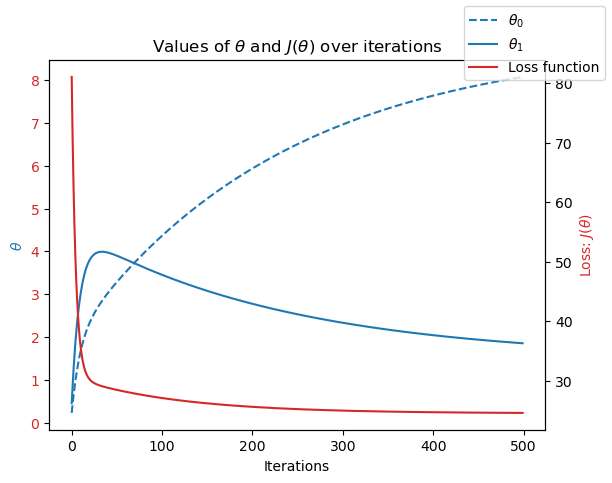

In [433]:
# Display the plot with the legend
plt.show()

In [434]:
%%time
# theta range
theta0_vals = np.linspace(0,10,100) #Look in the chart above for the limits of where theta0 and theta1 appear.
theta1_vals = np.linspace(0,5,100) #Put those values as the first two "linspace" numbers in these lines
                                      #Select with large margins, maybe +/- 10
J_vals = np.zeros((len(theta0_vals), len(theta1_vals)))

# compute cost for each combination of theta
c1=0; c2=0
for i in theta0_vals:
    for j in theta1_vals:
        t = np.array([i, j])
        J_vals[c1][c2] = compute_cost(X, y, t.transpose()).tolist()[0]
        c2=c2+1
    c1=c1+1
    c2=0 # reinitialize to 0

CPU times: total: 2 s
Wall time: 3.01 s


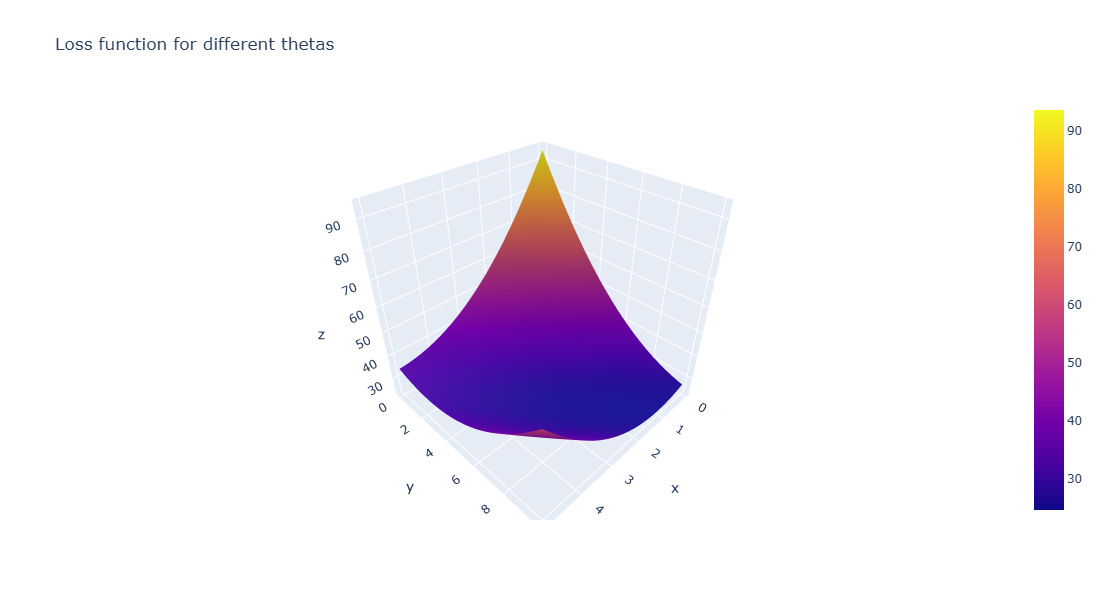

In [435]:
#This figure shows the loss function.

#X = Theta0
#Y - Theta1
#Z = Loss
#Find where it is closest to 0 in X and Y!

#you can click/hold in the graph below to rotate!

fig = go.Figure(data=[go.Surface(x=theta1_vals, y=theta0_vals, z=J_vals)])
fig.update_layout(title='Loss function for different thetas', autosize=True,
                  width=600, height=600, xaxis_title='theta0', 
                 yaxis_title='theta1')
fig.show()

### 8. look at a year of temperature data for one of the weather stations (MADRID 1961)

In [436]:
df5 = df[['DATE', 'MONTH','MADRID_cloud_cover','MADRID_wind_speed','MADRID_humidity','MADRID_pressure',
'MADRID_global_radiation','MADRID_precipitation','MADRID_sunshine',
'MADRID_sunshine', 'MADRID_temp_mean', 'MADRID_temp_min','MADRID_temp_max']].copy()

In [437]:
# Drop the DATE and MONTH data as those numbers are not scaled with the rest
notemp = df5.drop(['DATE', 'MONTH'], axis = 1)

In [438]:
#Reduce your dataset to a single year
dfyear = df5[df5['DATE'].astype(str).str.contains('1961')] 
dfyear

DATE  MONTH  MADRID_cloud_cover  MADRID_wind_speed  MADRID_humidity  \
366  19610101      1                   2                3.3             0.66   
367  19610102      1                   8                3.3             0.82   
368  19610103      1                   5                6.1             0.76   
369  19610104      1                   2                5.8             0.52   
370  19610105      1                   0                1.1             0.66   
..        ...    ...                 ...                ...              ...   
726  19611227     12                   6                0.0             0.92   
727  19611228     12                   6                3.3             0.88   
728  19611229     12                   8                2.8             0.90   
729  19611230     12                   8                4.2             0.85   
730  19611231     12                   8                0.8             0.91   

     MADRID_pressure  MADRID_global_radiation  MADRID_precipitation  \
366           1.0211                     1.13                  0.00   
367           1.0241                     0.61                  0.03   
368           1.0096                     0.81                  0.10   
369           1.0172                     1.02                  0.00   
370           1.0252                     1.13                  0.00   
..               ...                      ...                   ...   
726           1.0040                     0.36                  0.00   
727           1.0094                     0.83                  0.11   
728           1.0082                     0.64                  0.02   
729           1.0048                     0.28                  0.06   
730           1.0090                     0.28                  1.88   

     MADRID_sunshine  MADRID_sunshine  MADRID_temp_mean  MADRID_temp_min  \
366              8.4              8.4               6.3              3.8   
367              2.1              2.1               4.7              3.2   
368              4.2              4.2               7.4              4.5   
369              6.7              6.7               5.3              2.4   
370              8.2              8.2               4.8              1.4   
..               ...              ...               ...              ...   
726              0.3              0.3               7.0              5.8   
727              4.6              4.6               6.9              4.5   
728              2.5              2.5               8.8              6.3   
729              0.0              0.0               9.5              8.4   
730              0.0              0.0              10.0              8.4   

     MADRID_temp_max  
366              8.8  
367              6.2  
368             10.3  
369              8.2  
370              8.2  
..               ...  
726              8.2  
727              9.3  
728             11.3  
729             10.6  
730             11.6  

[365 rows x 13 columns]

In [439]:
dfyear.describe()

DATE       MONTH  MADRID_cloud_cover  MADRID_wind_speed  \
count  3.650000e+02  365.000000          365.000000         365.000000   
mean   1.961067e+07    6.526027            3.876712           1.766849   
std    3.454755e+02    3.452584            2.744351           1.692297   
min    1.961010e+07    1.000000            0.000000           0.000000   
25%    1.961040e+07    4.000000            1.000000           0.600000   
50%    1.961070e+07    7.000000            4.000000           1.400000   
75%    1.961100e+07   10.000000            6.000000           2.500000   
max    1.961123e+07   12.000000            8.000000           9.400000   

       MADRID_humidity  MADRID_pressure  MADRID_global_radiation  \
count       365.000000       365.000000               365.000000   
mean          0.592685         1.018359                 1.994219   
std           0.196994         0.006818                 1.022498   
min           0.180000         0.999200                 0.280000   
25%           0.430000         1.013900                 1.110000   
50%           0.570000         1.017700                 2.000000   
75%           0.760000         1.022700                 2.960000   
max           0.960000         1.035700                 3.650000   

       MADRID_precipitation  MADRID_sunshine  MADRID_sunshine  \
count            365.000000       365.000000       365.000000   
mean               0.121644         7.924110         7.924110   
std                0.384274         4.261728         4.261728   
min                0.000000         0.000000         0.000000   
25%                0.000000         4.600000         4.600000   
50%                0.000000         8.900000         8.900000   
75%                0.030000        11.100000        11.100000   
max                3.260000        14.200000        14.200000   

       MADRID_temp_mean  MADRID_temp_min  MADRID_temp_max  
count        365.000000       365.000000       365.000000  
mean          15.101370        10.301096        19.901370  
std            6.977769         5.913362         8.289648  
min            0.600000        -3.000000         3.200000  
25%           10.000000         5.900000        13.400000  
50%           14.100000         9.400000        19.300000  
75%           22.300000        15.800000        27.800000  
max           27.800000        21.500000        34.600000

In [440]:
#Drop the DATE and MONTH data as those numbers are not scaled with the rest
notempyear = dfyear.drop(['DATE','MONTH'], axis=1)

In [441]:
#We need to make an index for the year. Create a set of data from 1 to 365 (or to 366 if it's a leap year!)
#We'll scale this by 100 as the index is made. This will help teh gradient descent converge 366 = 3.66
i = np.arange(0.01,3.66,0.01) #<---needs to be one GREATER than the total number of days
index = pd.DataFrame(data = i, columns = ['index'])
index

index
0     0.01
1     0.02
2     0.03
3     0.04
4     0.05
..     ...
360   3.61
361   3.62
362   3.63
363   3.64
364   3.65

[365 rows x 1 columns]

In [442]:
n_rows = dfyear.shape[0]
n_rows

365

In [443]:
#This will translate your chosen weather data into the X and y datasets needed for the optimization function.

X=index.to_numpy().reshape(n_rows,1)
#Represent x_0 as a vector of 1s for vector computation
ones = np.ones((n_rows,1))
X = np.concatenate((ones, X), axis=1)
y=dfyear['MADRID_temp_mean'].to_numpy().reshape(n_rows,1) 

In [444]:
#what is the min temperature? (Note gradient descent is not actually finding this number)
dfyear['MADRID_temp_mean'].min()

0.6

In [445]:
#what is the max temperature? (Note gradient descent is not actually finding this number)
dfyear['MADRID_temp_mean'].max()

27.8

In [446]:
#This computes the loss function for the gradiant descent. DO NOT CHANGE!

def compute_cost(X, y, theta=np.array([[0],[0]])):
    """Given covariate matrix X, the prediction results y and coefficients theta
    compute the loss"""
    
    m = len(y)
    J=0 # initialize loss to zero
    
    # reshape theta
    theta=theta.reshape(2,1)
    
    # calculate the hypothesis - y_hat
    h_x = np.dot(X,theta)
    #print(h_x)
    
    # subtract y from y_hat, square and sum
    error_term = sum((h_x - y)**2)
    
    # divide by twice the number of samples - standard practice.
    loss = error_term/(2*m)
    
    return loss

In [447]:
#This is the gradiant descent function. DO NOT CHANGE!

def gradient_descent(X, y, theta=np.array([[0],[0]]),
                    alpha=0.01, num_iterations=1500):
    """
    Solve for theta using Gradient Descent optimiztion technique. 
    Alpha is the learning rate
    """
    m = len(y)
    J_history = []
    theta0_history = []
    theta1_history = []
    theta = theta.reshape(2,1)
    
    for i in range(num_iterations):
        error = (np.dot(X, theta) - y)
        
        term0 = (alpha/m) * sum(error* X[:,0].reshape(m,1))
        term1 = (alpha/m) * sum(error* X[:,1].reshape(m,1))
        
        # update theta
        term_vector = np.array([[term0],[term1]])
        #print(term_vector)
        theta = theta - term_vector.reshape(2,1)
        
        # store history values
        theta0_history.append(theta[0].tolist()[0])
        theta1_history.append(theta[1].tolist()[0])
        J_history.append(compute_cost(X,y,theta).tolist()[0])
        
    return (theta, J_history, theta0_history, theta1_history)

In [448]:
%%time
#This runs your data through a gradiant descent for the starting conditions in 'theta_init.'
#You will need to adjust these numbers

num_iterations=400 #<---Decide how many iterations you need. Start small and work up. Over 10,000 iterations will take a few seconds.
theta_init=np.array([[0],[0]]) #<---this is where you put the guess for [theta0], [theta1]. Start with 1 and 1.
alpha=0.05#<---Decide what your step size is. Try values between 0.1 and 0.00001. You will need to adjust your iterations.
#If your solution is not converging, try a smaller step size.
theta, J_history, theta0_history, theta1_history = gradient_descent(X,y, theta_init,
                                                                   alpha, num_iterations)

CPU times: total: 141 ms
Wall time: 493 ms


In [449]:
#This will plot your loss, theta0, and theta1.If the result looks like a straight line, it's not converging on an answer!
#Your loss (red) should be trending toward 0.

fig, ax1 = plt.subplots()

# plot thetas over time
color='tab:blue'
ax1.plot(theta0_history, label='$\\theta_{0}$', linestyle='--', color=color)
ax1.plot(theta1_history, label='$\\theta_{1}$', linestyle='-', color=color)
# ax1.legend()
ax1.set_xlabel('Iterations'); ax1.set_ylabel('$\\theta$', color=color);
ax1.tick_params(axis='y', labelcolor=color)

# plot loss function over time
color='tab:red'
ax2 = ax1.twinx()
ax2.plot(J_history, label='Loss function', color=color)
ax2.set_title('Values of $\\theta$ and $J(\\theta)$ over iterations')
ax2.set_ylabel('Loss: $J(\\theta)$', color=color)
ax1.tick_params(axis='y', labelcolor=color)

# ax2.legend();
fig.legend();

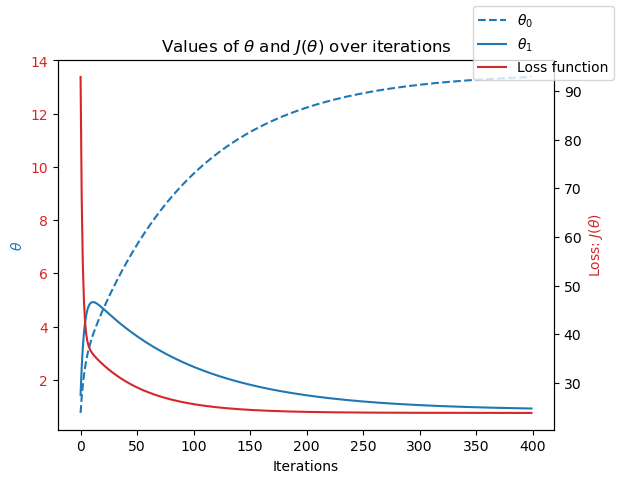

In [450]:
# Display the plot with the legend
plt.show()

In [451]:
%%time
# theta range
theta0_vals = np.linspace(0,14,100) #Look in the chart above for the limits of where theta0 and theta1 appear.
theta1_vals = np.linspace(0,6,100) #Put those values as the first two "linspace" numbers in these lines
                                      #Select with large margins, maybe +/- 10
J_vals = np.zeros((len(theta0_vals), len(theta1_vals)))

# compute cost for each combination of theta
c1=0; c2=0
for i in theta0_vals:
    for j in theta1_vals:
        t = np.array([i, j])
        J_vals[c1][c2] = compute_cost(X, y, t.transpose()).tolist()[0]
        c2=c2+1
    c1=c1+1
    c2=0 # reinitialize to 0

CPU times: total: 2.52 s
Wall time: 3.44 s


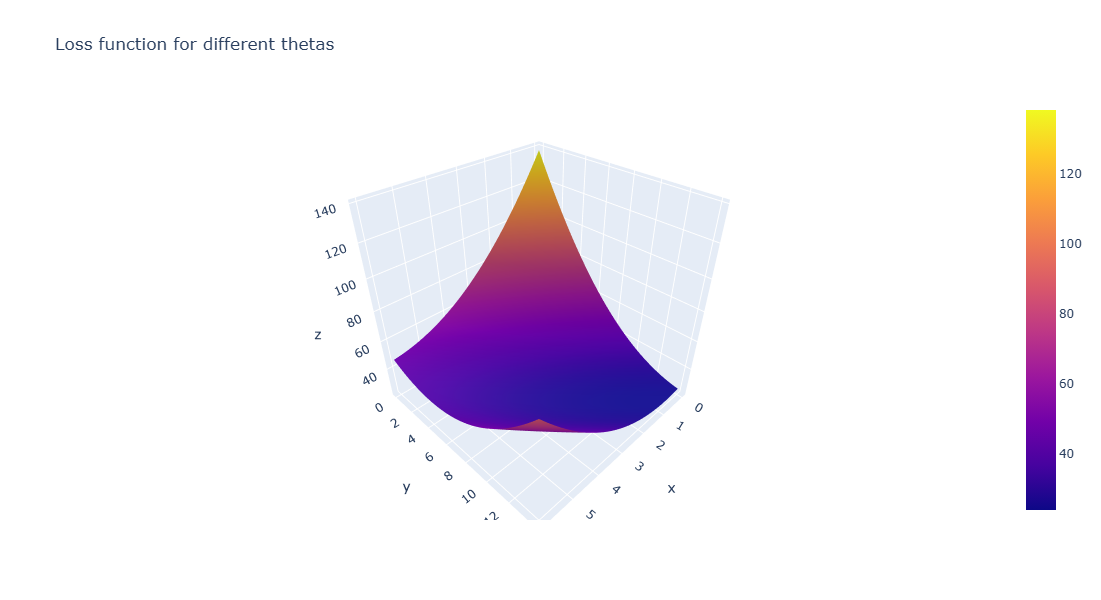

In [452]:
#This figure shows the loss function.

#X = Theta0
#Y - Theta1
#Z = Loss
#Find where it is closest to 0 in X and Y!

#you can click/hold in the graph below to rotate!

fig = go.Figure(data=[go.Surface(x=theta1_vals, y=theta0_vals, z=J_vals)])
fig.update_layout(title='Loss function for different thetas', autosize=True,
                  width=600, height=600, xaxis_title='theta0', 
                 yaxis_title='theta1')
fig.show()

### 9. look at a year of temperature data for one of the weather stations (MADRID 1990)

In [453]:
#Reduce your dataset to a single year
dfyear = df5[df5['DATE'].astype(str).str.contains('1990')] 
dfyear

DATE  MONTH  MADRID_cloud_cover  MADRID_wind_speed  \
10958  19900101      1                   8                0.0   
10959  19900102      1                   8                1.1   
10960  19900103      1                   7                1.1   
10961  19900104      1                   4                1.1   
10962  19900105      1                   1                1.1   
...         ...    ...                 ...                ...   
11318  19901227     12                   6                1.7   
11319  19901228     12                   8                1.4   
11320  19901229     12                   8                0.8   
11321  19901230     12                   8                0.3   
11322  19901231     12                   8                0.8   

       MADRID_humidity  MADRID_pressure  MADRID_global_radiation  \
10958             0.96           1.0215                     0.29   
10959             0.90           1.0232                     0.29   
10960             0.87           1.0128                     0.41   
10961             0.72           1.0239                     0.99   
10962             0.77           1.0303                     1.08   
...                ...              ...                      ...   
11318             0.86           1.0249                     0.31   
11319             0.90           1.0284                     0.39   
11320             0.95           1.0281                     0.20   
11321             0.95           1.0290                     0.25   
11322             0.88           1.0271                     0.17   

       MADRID_precipitation  MADRID_sunshine  MADRID_sunshine  \
10958                  0.65              0.0              0.0   
10959                  0.50              0.0              0.0   
10960                  0.07              0.5              0.5   
10961                  0.00              6.4              6.4   
10962                  0.00              7.5              7.5   
...                     ...              ...              ...   
11318                  0.00              0.0              0.0   
11319                  0.09              0.2              0.2   
11320                  0.10              0.0              0.0   
11321                  0.02              0.0              0.0   
11322                  0.09              0.0              0.0   

       MADRID_temp_mean  MADRID_temp_min  MADRID_temp_max  
10958               7.7              7.0              8.4  
10959               6.5              5.6              7.4  
10960               7.0              4.9              9.0  
10961               6.5              2.5             10.5  
10962               6.9              3.4             10.4  
...                 ...              ...              ...  
11318               8.7              6.2             11.2  
11319               8.2              6.4             10.0  
11320               8.6              7.8              9.4  
11321               8.3              7.4              9.2  
11322               7.8              7.1              8.6  

[365 rows x 13 columns]

In [454]:
dfyear.describe()

DATE       MONTH  MADRID_cloud_cover  MADRID_wind_speed  \
count  3.650000e+02  365.000000          365.000000         365.000000   
mean   1.990067e+07    6.526027            3.284932           2.119452   
std    3.454755e+02    3.452584            2.405561           0.993069   
min    1.990010e+07    1.000000            0.000000           0.000000   
25%    1.990040e+07    4.000000            1.000000           1.400000   
50%    1.990070e+07    7.000000            3.000000           1.900000   
75%    1.990100e+07   10.000000            5.000000           2.800000   
max    1.990123e+07   12.000000            8.000000           5.800000   

       MADRID_humidity  MADRID_pressure  MADRID_global_radiation  \
count       365.000000       365.000000               365.000000   
mean          0.555342         1.019759                 1.897397   
std           0.183576         0.006758                 0.952090   
min           0.140000         1.000400                 0.140000   
25%           0.420000         1.015000                 1.060000   
50%           0.550000         1.018300                 1.820000   
75%           0.690000         1.024000                 2.770000   
max           0.960000         1.038600                 3.590000   

       MADRID_precipitation  MADRID_sunshine  MADRID_sunshine  \
count            365.000000       365.000000       365.000000   
mean               0.083370         7.627123         7.627123   
std                0.271085         4.010310         4.010310   
min                0.000000         0.000000         0.000000   
25%                0.000000         4.800000         4.800000   
50%                0.000000         8.500000         8.500000   
75%                0.000000        10.900000        10.900000   
max                2.390000        13.900000        13.900000   

       MADRID_temp_mean  MADRID_temp_min  MADRID_temp_max  
count        365.000000       365.000000       365.000000  
mean          15.404932        10.604658        20.206301  
std            7.592396         6.695607         8.667363  
min            2.000000        -2.000000         4.000000  
25%            9.000000         5.200000        12.500000  
50%           14.100000         9.400000        19.200000  
75%           22.300000        16.400000        28.200000  
max           31.000000        25.000000        37.000000

In [455]:
#Drop the DATE and MONTH data as those numbers are not scaled with the rest
notempyear = dfyear.drop(['DATE','MONTH'], axis=1)

In [456]:
#We need to make an index for the year. Create a set of data from 1 to 365 (or to 366 if it's a leap year!)
#We'll scale this by 100 as the index is made. This will help teh gradient descent converge 366 = 3.66
i = np.arange(0.01,3.66,0.01) #<---needs to be one GREATER than the total number of days
index = pd.DataFrame(data = i, columns = ['index'])
index

index
0     0.01
1     0.02
2     0.03
3     0.04
4     0.05
..     ...
360   3.61
361   3.62
362   3.63
363   3.64
364   3.65

[365 rows x 1 columns]

In [457]:
n_rows = dfyear.shape[0]
n_rows

365

In [458]:
#This will translate your chosen weather data into the X and y datasets needed for the optimization function.

X=index.to_numpy().reshape(n_rows,1)
#Represent x_0 as a vector of 1s for vector computation
ones = np.ones((n_rows,1))
X = np.concatenate((ones, X), axis=1)
y=dfyear['MADRID_temp_mean'].to_numpy().reshape(n_rows,1) 

In [459]:
#what is the min temperature? (Note gradient descent is not actually finding this number)
dfyear['MADRID_temp_mean'].min()

2.0

In [460]:
#what is the max temperature? (Note gradient descent is not actually finding this number)
dfyear['MADRID_temp_mean'].max()

31.0

In [461]:
#This computes the loss function for the gradiant descent. DO NOT CHANGE!

def compute_cost(X, y, theta=np.array([[0],[0]])):
    """Given covariate matrix X, the prediction results y and coefficients theta
    compute the loss"""
    
    m = len(y)
    J=0 # initialize loss to zero
    
    # reshape theta
    theta=theta.reshape(2,1)
    
    # calculate the hypothesis - y_hat
    h_x = np.dot(X,theta)
    #print(h_x)
    
    # subtract y from y_hat, square and sum
    error_term = sum((h_x - y)**2)
    
    # divide by twice the number of samples - standard practice.
    loss = error_term/(2*m)
    
    return loss

In [462]:
#This is the gradiant descent function. DO NOT CHANGE!

def gradient_descent(X, y, theta=np.array([[0],[0]]),
                    alpha=0.01, num_iterations=1500):
    """
    Solve for theta using Gradient Descent optimiztion technique. 
    Alpha is the learning rate
    """
    m = len(y)
    J_history = []
    theta0_history = []
    theta1_history = []
    theta = theta.reshape(2,1)
    
    for i in range(num_iterations):
        error = (np.dot(X, theta) - y)
        
        term0 = (alpha/m) * sum(error* X[:,0].reshape(m,1))
        term1 = (alpha/m) * sum(error* X[:,1].reshape(m,1))
        
        # update theta
        term_vector = np.array([[term0],[term1]])
        #print(term_vector)
        theta = theta - term_vector.reshape(2,1)
        
        # store history values
        theta0_history.append(theta[0].tolist()[0])
        theta1_history.append(theta[1].tolist()[0])
        J_history.append(compute_cost(X,y,theta).tolist()[0])
        
    return (theta, J_history, theta0_history, theta1_history)

In [463]:
%%time
#This runs your data through a gradiant descent for the starting conditions in 'theta_init.'
#You will need to adjust these numbers

num_iterations=300 #<---Decide how many iterations you need. Start small and work up. Over 10,000 iterations will take a few seconds.
theta_init=np.array([[0],[0]]) #<---this is where you put the guess for [theta0], [theta1]. Start with 1 and 1.
alpha=0.01#<---Decide what your step size is. Try values between 0.1 and 0.00001. You will need to adjust your iterations.
#If your solution is not converging, try a smaller step size.
theta, J_history, theta0_history, theta1_history = gradient_descent(X,y, theta_init,
                                                                   alpha, num_iterations)

CPU times: total: 172 ms
Wall time: 472 ms


In [464]:
#This will plot your loss, theta0, and theta1.If the result looks like a straight line, it's not converging on an answer!
#Your loss (red) should be trending toward 0.

fig, ax1 = plt.subplots()

# plot thetas over time
color='tab:blue'
ax1.plot(theta0_history, label='$\\theta_{0}$', linestyle='--', color=color)
ax1.plot(theta1_history, label='$\\theta_{1}$', linestyle='-', color=color)
# ax1.legend()
ax1.set_xlabel('Iterations'); ax1.set_ylabel('$\\theta$', color=color);
ax1.tick_params(axis='y', labelcolor=color)

# plot loss function over time
color='tab:red'
ax2 = ax1.twinx()
ax2.plot(J_history, label='Loss function', color=color)
ax2.set_title('Values of $\\theta$ and $J(\\theta)$ over iterations')
ax2.set_ylabel('Loss: $J(\\theta)$', color=color)
ax1.tick_params(axis='y', labelcolor=color)

# ax2.legend();
fig.legend();

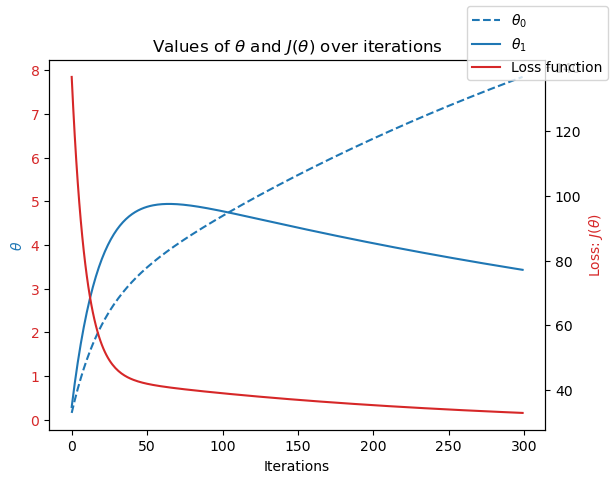

In [465]:
# Display the plot with the legend
plt.show()

In [466]:
%%time
# theta range
theta0_vals = np.linspace(-1,10,100) #Look in the chart above for the limits of where theta0 and theta1 appear.
theta1_vals = np.linspace(-1,6,100) #Put those values as the first two "linspace" numbers in these lines
                                      #Select with large margins, maybe +/- 10
J_vals = np.zeros((len(theta0_vals), len(theta1_vals)))

# compute cost for each combination of theta
c1=0; c2=0
for i in theta0_vals:
    for j in theta1_vals:
        t = np.array([i, j])
        J_vals[c1][c2] = compute_cost(X, y, t.transpose()).tolist()[0]
        c2=c2+1
    c1=c1+1
    c2=0 # reinitialize to 0

CPU times: total: 2.59 s
Wall time: 3.15 s


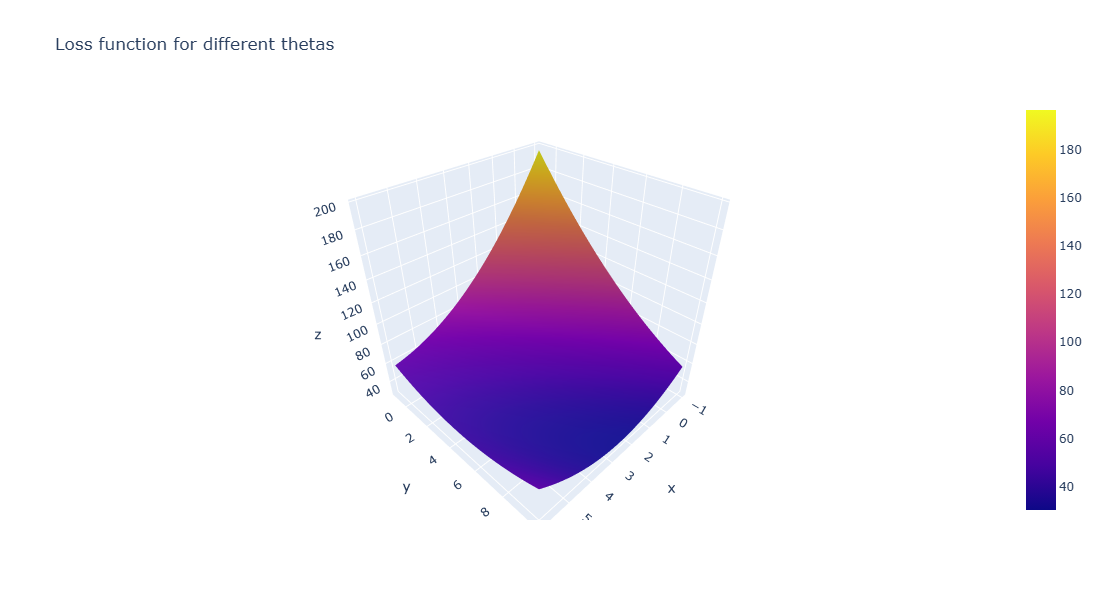

In [467]:
#This figure shows the loss function.

#X = Theta0
#Y - Theta1
#Z = Loss
#Find where it is closest to 0 in X and Y!

#you can click/hold in the graph below to rotate!

fig = go.Figure(data=[go.Surface(x=theta1_vals, y=theta0_vals, z=J_vals)])
fig.update_layout(title='Loss function for different thetas', autosize=True,
                  width=600, height=600, xaxis_title='theta0', 
                 yaxis_title='theta1')
fig.show()

### 10. look at a year of temperature data for one of the weather stations (MADRID 2019)

In [468]:
#Reduce your dataset to a single year
dfyear = df5[df5['DATE'].astype(str).str.contains('2019')] 
dfyear

DATE  MONTH  MADRID_cloud_cover  MADRID_wind_speed  \
21550  20190101      1                   0                1.1   
21551  20190102      1                   0                0.6   
21552  20190103      1                   2                1.4   
21553  20190104      1                   0                0.6   
21554  20190105      1                   0                0.6   
...         ...    ...                 ...                ...   
21910  20191227     12                   2                1.1   
21911  20191228     12                   1                0.8   
21912  20191229     12                   1                0.8   
21913  20191230     12                   1                0.8   
21914  20191231     12                   1                0.3   

       MADRID_humidity  MADRID_pressure  MADRID_global_radiation  \
21550             0.48           1.0321                     1.14   
21551             0.57           1.0294                     1.13   
21552             0.46           1.0294                     1.15   
21553             0.58           1.0314                     1.19   
21554             0.57           1.0341                     1.16   
...                ...              ...                      ...   
21910             0.62           1.0302                     1.10   
21911             0.44           1.0300                     1.11   
21912             0.46           1.0316                     1.12   
21913             0.72           1.0326                     1.06   
21914             0.71           1.0324                     1.14   

       MADRID_precipitation  MADRID_sunshine  MADRID_sunshine  \
21550                   0.0              9.0              9.0   
21551                   0.0              9.1              9.1   
21552                   0.0              7.7              7.7   
21553                   0.0              9.1              9.1   
21554                   0.0              9.0              9.0   
...                     ...              ...              ...   
21910                   0.0              8.4              8.4   
21911                   0.0              9.0              9.0   
21912                   0.0              9.0              9.0   
21913                   0.0              8.9              8.9   
21914                   0.0              8.7              8.7   

       MADRID_temp_mean  MADRID_temp_min  MADRID_temp_max  
21550               6.6              1.4             11.7  
21551               6.0              0.4             11.7  
21552               7.3              2.8             11.8  
21553               5.9              0.4             11.4  
21554               5.4             -0.1             10.8  
...                 ...              ...              ...  
21910               8.9              4.3             13.5  
21911               8.2              2.5             13.9  
21912               7.8              2.5             13.2  
21913               7.0              2.5             11.5  
21914               6.8              2.3             11.4  

[365 rows x 13 columns]

In [469]:
dfyear.describe()

DATE       MONTH  MADRID_cloud_cover  MADRID_wind_speed  \
count  3.650000e+02  365.000000           365.00000         365.000000   
mean   2.019067e+07    6.526027             3.10411           2.018904   
std    3.454755e+02    3.452584             2.52354           0.988116   
min    2.019010e+07    1.000000             0.00000           0.300000   
25%    2.019040e+07    4.000000             1.00000           1.100000   
50%    2.019070e+07    7.000000             3.00000           1.900000   
75%    2.019100e+07   10.000000             5.00000           2.800000   
max    2.019123e+07   12.000000             8.00000           5.000000   

       MADRID_humidity  MADRID_pressure  MADRID_global_radiation  \
count       365.000000       365.000000               365.000000   
mean          0.507260         1.016356                 2.033726   
std           0.157958         0.007436                 0.938403   
min           0.250000         0.994600                 0.150000   
25%           0.380000         1.011200                 1.160000   
50%           0.480000         1.015200                 2.080000   
75%           0.620000         1.020000                 2.960000   
max           0.940000         1.059700                 3.360000   

       MADRID_precipitation  MADRID_sunshine  MADRID_sunshine  \
count            365.000000       365.000000       365.000000   
mean               0.107260         8.823014         8.823014   
std                0.397976         3.774643         3.774643   
min                0.000000         0.000000         0.000000   
25%                0.000000         7.100000         7.100000   
50%                0.000000         9.900000         9.900000   
75%                0.000000        11.800000        11.800000   
max                3.840000        13.500000        13.500000   

       MADRID_temp_mean  MADRID_temp_min  MADRID_temp_max  
count        365.000000       365.000000       365.000000  
mean          16.143288        10.873973        21.408493  
std            7.609713         6.698639         8.782973  
min            2.000000        -1.800000         4.400000  
25%            9.600000         5.400000        13.500000  
50%           14.600000         9.700000        20.500000  
75%           21.700000        15.700000        28.500000  
max           32.400000        25.000000        40.700000

In [470]:
#Drop the DATE and MONTH data as those numbers are not scaled with the rest
notempyear = dfyear.drop(['DATE','MONTH'], axis=1)

In [471]:
#We need to make an index for the year. Create a set of data from 1 to 365 (or to 366 if it's a leap year!)
#We'll scale this by 100 as the index is made. This will help teh gradient descent converge 366 = 3.66
i = np.arange(0.01,3.66,0.01) #<---needs to be one GREATER than the total number of days
index = pd.DataFrame(data = i, columns = ['index'])
index

index
0     0.01
1     0.02
2     0.03
3     0.04
4     0.05
..     ...
360   3.61
361   3.62
362   3.63
363   3.64
364   3.65

[365 rows x 1 columns]

In [472]:
n_rows = dfyear.shape[0]
n_rows

365

In [473]:
#This will translate your chosen weather data into the X and y datasets needed for the optimization function.

X=index.to_numpy().reshape(n_rows,1)
#Represent x_0 as a vector of 1s for vector computation
ones = np.ones((n_rows,1))
X = np.concatenate((ones, X), axis=1)
y=dfyear['MADRID_temp_mean'].to_numpy().reshape(n_rows,1) 

In [474]:
#what is the min temperature? (Note gradient descent is not actually finding this number)
dfyear['MADRID_temp_mean'].min()

2.0

In [475]:
#what is the max temperature? (Note gradient descent is not actually finding this number)
dfyear['MADRID_temp_mean'].max()

32.4

In [476]:
#This computes the loss function for the gradiant descent. DO NOT CHANGE!

def compute_cost(X, y, theta=np.array([[0],[0]])):
    """Given covariate matrix X, the prediction results y and coefficients theta
    compute the loss"""
    
    m = len(y)
    J=0 # initialize loss to zero
    
    # reshape theta
    theta=theta.reshape(2,1)
    
    # calculate the hypothesis - y_hat
    h_x = np.dot(X,theta)
    #print(h_x)
    
    # subtract y from y_hat, square and sum
    error_term = sum((h_x - y)**2)
    
    # divide by twice the number of samples - standard practice.
    loss = error_term/(2*m)
    
    return loss

In [477]:
#This is the gradiant descent function. DO NOT CHANGE!

def gradient_descent(X, y, theta=np.array([[0],[0]]),
                    alpha=0.01, num_iterations=1500):
    """
    Solve for theta using Gradient Descent optimiztion technique. 
    Alpha is the learning rate
    """
    m = len(y)
    J_history = []
    theta0_history = []
    theta1_history = []
    theta = theta.reshape(2,1)
    
    for i in range(num_iterations):
        error = (np.dot(X, theta) - y)
        
        term0 = (alpha/m) * sum(error* X[:,0].reshape(m,1))
        term1 = (alpha/m) * sum(error* X[:,1].reshape(m,1))
        
        # update theta
        term_vector = np.array([[term0],[term1]])
        #print(term_vector)
        theta = theta - term_vector.reshape(2,1)
        
        # store history values
        theta0_history.append(theta[0].tolist()[0])
        theta1_history.append(theta[1].tolist()[0])
        J_history.append(compute_cost(X,y,theta).tolist()[0])
        
    return (theta, J_history, theta0_history, theta1_history)

In [478]:
%%time
#This runs your data through a gradiant descent for the starting conditions in 'theta_init.'
#You will need to adjust these numbers

num_iterations=200 #<---Decide how many iterations you need. Start small and work up. Over 10,000 iterations will take a few seconds.
theta_init=np.array([[0],[0]]) #<---this is where you put the guess for [theta0], [theta1]. Start with 1 and 1.
alpha=0.02#<---Decide what your step size is. Try values between 0.1 and 0.00001. You will need to adjust your iterations.
#If your solution is not converging, try a smaller step size.
theta, J_history, theta0_history, theta1_history = gradient_descent(X,y, theta_init,
                                                                   alpha, num_iterations)

CPU times: total: 46.9 ms
Wall time: 194 ms


In [479]:
#This will plot your loss, theta0, and theta1.If the result looks like a straight line, it's not converging on an answer!
#Your loss (red) should be trending toward 0.

fig, ax1 = plt.subplots()

# plot thetas over time
color='tab:blue'
ax1.plot(theta0_history, label='$\\theta_{0}$', linestyle='--', color=color)
ax1.plot(theta1_history, label='$\\theta_{1}$', linestyle='-', color=color)
# ax1.legend()
ax1.set_xlabel('Iterations'); ax1.set_ylabel('$\\theta$', color=color);
ax1.tick_params(axis='y', labelcolor=color)

# plot loss function over time
color='tab:red'
ax2 = ax1.twinx()
ax2.plot(J_history, label='Loss function', color=color)
ax2.set_title('Values of $\\theta$ and $J(\\theta)$ over iterations')
ax2.set_ylabel('Loss: $J(\\theta)$', color=color)
ax1.tick_params(axis='y', labelcolor=color)

# ax2.legend();
fig.legend();

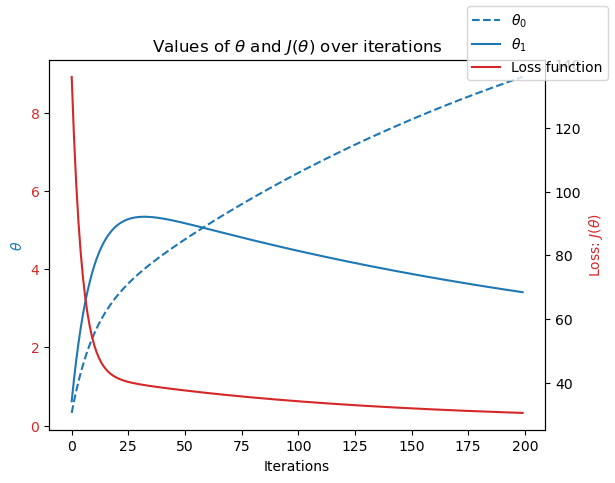

In [480]:
# Display the plot with the legend
plt.show()

In [481]:
%%time
# theta range
theta0_vals = np.linspace(-1,11,100) #Look in the chart above for the limits of where theta0 and theta1 appear.
theta1_vals = np.linspace(-1,6,100) #Put those values as the first two "linspace" numbers in these lines
                                      #Select with large margins, maybe +/- 10
J_vals = np.zeros((len(theta0_vals), len(theta1_vals)))

# compute cost for each combination of theta
c1=0; c2=0
for i in theta0_vals:
    for j in theta1_vals:
        t = np.array([i, j])
        J_vals[c1][c2] = compute_cost(X, y, t.transpose()).tolist()[0]
        c2=c2+1
    c1=c1+1
    c2=0 # reinitialize to 0

CPU times: total: 1.91 s
Wall time: 3.42 s


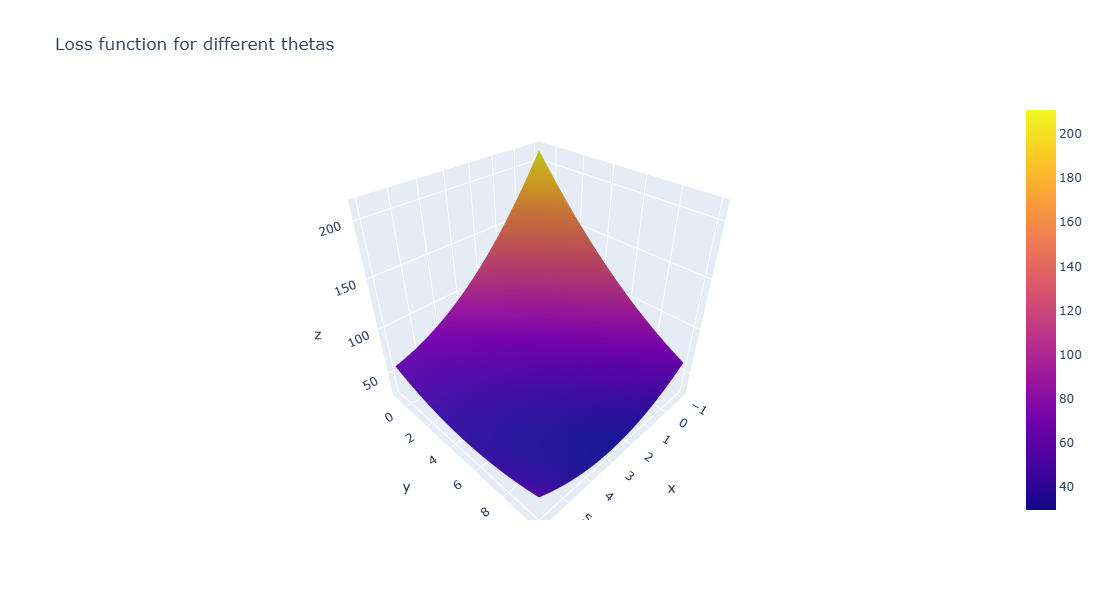

In [484]:
#This figure shows the loss function.

#X = Theta0
#Y - Theta1
#Z = Loss
#Find where it is closest to 0 in X and Y!

#you can click/hold in the graph below to rotate!

fig = go.Figure(data=[go.Surface(x=theta1_vals, y=theta0_vals, z=J_vals)])
fig.update_layout(title='Loss function for different thetas', autosize=True,
                  width=600, height=600, xaxis_title='theta0', 
                 yaxis_title='theta1')
fig.show()